# **DRiM CHALLENGE 2022**
First tasks form October to November:
- Knowledge of the topic and the available data
- Design by the teams of the prototype of their solution
• Selection by the training managers of the 2 teams 


# 0. Subject and data



- Preliminary analysis:
> - Presentation of the database
> - Stationarity analyses
> - Possible transformations on the variables
> - Analysis of correlations
> - Verification of the hypotheses underlying the models used

- Predictions models:
> - Traditional modelling techniques: testing ARDL, ARIMAX ... -> CI integration
> - Recent modelling techniques: testing relevant models
> - Provide interpretation of results for both families of models

- Performance:
> - Present and interpret the results of the main performance indicators to validate the forecast model (BIC, AIC,...)
> - Validate the quality of the forecasts (Back-testing on the 2nd day): compare the projection with the observation and present/interpret the synthetic indicators (RMSE MAE,...)

- Dynamic restitution:
> - Powerpoint: presentation of the objective, approach, data, results
> - Data visualisation
> - Oral presentation of the content in 15 min

# 1. Libraries and Google Drive

In [1]:
import pandas as pd # Used to open and analyse the dataset
import matplotlib.pyplot as plt # Used to create charts
import numpy as np # Used to do data processing
import plotly as plty # Used to create charts
import seaborn as sns # Used to create charts
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller # Used to check stationarity 
from sklearn.model_selection import train_test_split
import xgboost as xgb
from scipy.stats import shapiro
sns.set()

C:\Users\basho\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


ModuleNotFoundError: No module named 'xgboost'

In [2]:
!pip install xgboost

# 2. Data importation and reading

In [3]:
# Same link for everyone:
data = pd.read_sas("datas/construct_red.sas7bdat")

In [5]:
# First view of the data:
data.head(15)

,TRIMESTRE,CHRONIQUE,DR,mean_1,median_1,p5_1,p10_1,p25_1,p75_1,p90_1,...,CD_MOD_HABI_2,CD_PROF_1,CD_PROF_2,CD_PROF_3,CD_QUAL_VEH_1,CD_QUAL_VEH_2,dtf_per_trt,PIB,Inflation,Tx_cho
0,2008-12-31,b'CHR2',0.0030,0.994843,0.995192,0.992081,0.992530,0.993691,0.996259,0.996862,...,0.727543,0.070852,0.351216,0.577932,0.392129,0.607871,b'Q42008',497736.0,1.760576,7.800000
1,2008-12-31,b'CHR8',0.1924,0.945694,0.953968,0.870889,0.890246,0.924743,0.976024,0.990229,...,0.320747,0.181759,0.541801,0.276439,0.548512,0.451488,b'Q42008',497736.0,1.760576,7.800000
2,2008-12-31,b'Totale',0.0240,0.975114,0.993819,0.909173,0.940773,0.978358,0.998133,0.999224,...,0.656708,0.102888,0.370723,0.526389,0.451145,0.548855,b'Q42008',497736.0,1.760576,7.800000
3,2009-03-31,b'CHR2',0.0025,0.994782,0.995192,0.992097,0.992579,0.993694,0.996275,0.996862,...,0.738127,0.068228,0.342803,0.588969,0.376661,0.623339,b'Q12009',489227.0,0.624887,8.600000
4,2009-03-31,b'CHR8',0.1436,0.947787,0.956417,0.870889,0.893328,0.927447,0.978988,0.991735,...,0.346455,0.177304,0.532900,0.289797,0.543935,0.456065,b'Q12009',489227.0,0.624887,8.600000
5,2009-03-31,b'Totale',0.0198,0.975488,0.993910,0.910860,0.941966,0.978661,0.998155,0.999213,...,0.665213,0.099348,0.363966,0.536686,0.436627,0.563373,b'Q12009',489227.0,0.624887,8.600000
6,2009-06-30,b'CHR2',0.0026,0.994799,0.995176,0.992109,0.992591,0.993691,0.996275,0.996864,...,0.739670,0.066922,0.346352,0.586726,0.372296,0.627704,b'Q22009',488744.0,-0.206626,9.133333
7,2009-06-30,b'CHR8',0.1418,0.949647,0.958201,0.873729,0.896533,0.929212,0.980143,0.992275,...,0.359461,0.175250,0.534307,0.290442,0.534792,0.465208,b'Q22009',488744.0,-0.206626,9.133333
8,2009-06-30,b'Totale',0.0190,0.975538,0.993828,0.912033,0.942061,0.978377,0.998148,0.999210,...,0.664837,0.098614,0.366691,0.534694,0.431299,0.568701,b'Q22009',488744.0,-0.206626,9.133333
9,2009-09-30,b'CHR2',0.0026,0.994796,0.995147,0.992103,0.992587,0.993679,0.996273,0.996862,...,0.746292,0.066023,0.342026,0.591951,0.366987,0.633013,b'Q32009',489557.0,-0.423247,9.166667


In [6]:
data.tail()

,TRIMESTRE,CHRONIQUE,DR,mean_1,median_1,p5_1,p10_1,p25_1,p75_1,p90_1,...,CD_MOD_HABI_2,CD_PROF_1,CD_PROF_2,CD_PROF_3,CD_QUAL_VEH_1,CD_QUAL_VEH_2,dtf_per_trt,PIB,Inflation,Tx_cho
73,2014-12-31,b'CHR8',0.1420,0.945045,0.954124,0.867099,0.890238,0.923678,0.976668,0.990908,...,0.380543,0.163969,0.550329,0.285702,0.445203,0.554797,b'Q4 2014',519315.0,0.277815,10.500000
74,2014-12-31,b'Totale',0.0148,0.979524,0.993822,0.913891,0.941424,0.977598,0.998348,0.999386,...,0.697692,0.093913,0.375277,0.530810,0.393627,0.606373,b'Q4 2014',519315.0,0.277815,10.500000
75,2015-03-31,b'CHR2',0.0019,0.994820,0.995156,0.992071,0.992495,0.993647,0.996268,0.996839,...,0.802613,0.072954,0.352079,0.574967,0.344226,0.655774,b'Q1 2015',522560.0,-0.240585,10.366667
76,2015-03-31,b'CHR8',0.1381,0.944559,0.953416,0.866626,0.888926,0.922654,0.976460,0.990459,...,0.373486,0.166169,0.551933,0.281898,0.449726,0.550274,b'Q1 2015',522560.0,-0.240585,10.366667
77,2015-03-31,b'Totale',0.0145,0.979689,0.993815,0.914376,0.941545,0.977605,0.998367,0.999413,...,0.691620,0.095614,0.384833,0.519553,0.390524,0.609476,b'Q1 2015',522560.0,-0.240585,10.366667


# 3.  Preliminary analysis

- Preliminary analysis:
> - Presentation of the database
> - Stationarity analyses
> - Possible transformations on the variables
> - Analysis of correlations
> - Verification of the hypotheses underlying the models used


## a. Dimensions, types, and Nan

In [7]:
print(f"Dimensions of the initial Dataset: {data.shape}")

Dimensions of the initial Dataset: (78, 82)


Remark: It's a small dataset

In [8]:
# Listing of all the columns:
columns = data.columns
print("The dataset columns are:")
for i in range(3):
  print(columns[i])
for i in range(8):
  print(*columns[3+8*i:11+8*i])
for i in range(3):
  print(*columns[67+2*i:69+2*i])
print(*columns[73:76])
print(*columns[76:78])
for i in range(4):
  print(columns[78+i])

The dataset columns are:
TRIMESTRE
CHRONIQUE
DR
mean_1 median_1 p5_1 p10_1 p25_1 p75_1 p90_1 p95_1
mean_2 median_2 p5_2 p10_2 p25_2 p75_2 p90_2 p95_2
mean_3 median_3 p5_3 p10_3 p25_3 p75_3 p90_3 p95_3
mean_4 median_4 p5_4 p10_4 p25_4 p75_4 p90_4 p95_4
mean_5 median_5 p5_5 p10_5 p25_5 p75_5 p90_5 p95_5
mean_6 median_6 p5_6 p10_6 p25_6 p75_6 p90_6 p95_6
mean_7 median_7 p5_7 p10_7 p25_7 p75_7 p90_7 p95_7
mean_8 median_8 p5_8 p10_8 p25_8 p75_8 p90_8 p95_8
CD_TY_CLI_RCI_1 CD_TY_CLI_RCI_2
CD_ETA_CIV_1 CD_ETA_CIV_2
CD_MOD_HABI_1 CD_MOD_HABI_2
CD_PROF_1 CD_PROF_2 CD_PROF_3
CD_QUAL_VEH_1 CD_QUAL_VEH_2
dtf_per_trt
PIB
Inflation
Tx_cho


Remarks: 

The values with mean, median etc. are refering to other variables that we  give there:
- 1 -> DER_NOT_OCT_RCAL -> Recalculated award score
- 2 -> DUR_DER_IMP_REGU -> Time elapsed since last payment
- 3 -> DUR_IMP_ENC -> Duration of outstanding payment
- 4 -> DUR_MAX_IMP -> Maximum duration of the unpaid amount
- 5 -> MT_CREA_AP_SOL_CT -> Receivable after distribution of credit balance
- 6 -> RAT_INC_REGU_Z_MAT -> Number of regularized incidents recorded since the date of entry into management
- 7 -> RAT_RAN_IMP_Z_DUR -> Ratio of the rank of the first regularized payment to the expected duration of the contract
- 8 -> RAT_APPO -> Percentage contribution

In [9]:
# Types of the variables (important in the future when we will use them in models)
data.dtypes.value_counts()

float64           79
object             2
datetime64[ns]     1
dtype: int64

Remarks:
* datetime64 type is the "TRIMESTRE" column
* object type are the "CHRONIQUE" and "dtf_per_trt" columns
* All the other values are float like percentage or numeric values

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TRIMESTRE        78 non-null     datetime64[ns]
 1   CHRONIQUE        78 non-null     object        
 2   DR               78 non-null     float64       
 3   mean_1           78 non-null     float64       
 4   median_1         78 non-null     float64       
 5   p5_1             78 non-null     float64       
 6   p10_1            78 non-null     float64       
 7   p25_1            78 non-null     float64       
 8   p75_1            78 non-null     float64       
 9   p90_1            78 non-null     float64       
 10  p95_1            78 non-null     float64       
 11  mean_2           78 non-null     float64       
 12  median_2         78 non-null     float64       
 13  p5_2             78 non-null     float64       
 14  p10_2            78 non-null     float64    

Remarks:
- There is no missing value in the dataset

## b. Dividing and ploting the dataset

We have to forecast the variable DR: 12-months default rate.
The dataset is in reality three different dataset and we can compare them with the "CHRONIQUE" variable. After creating these three dataset we will work on each other to determine what are the important features to use.



In [12]:
data1 = data[data.CHRONIQUE == b'CHR2']
data2 = data[data.CHRONIQUE == b'CHR8']
data3 = data[data.CHRONIQUE == b'Totale']
Y1 = data1.DR
Y2 = data2.DR
Y3 = data3.DR

## c. General focus on DR

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  


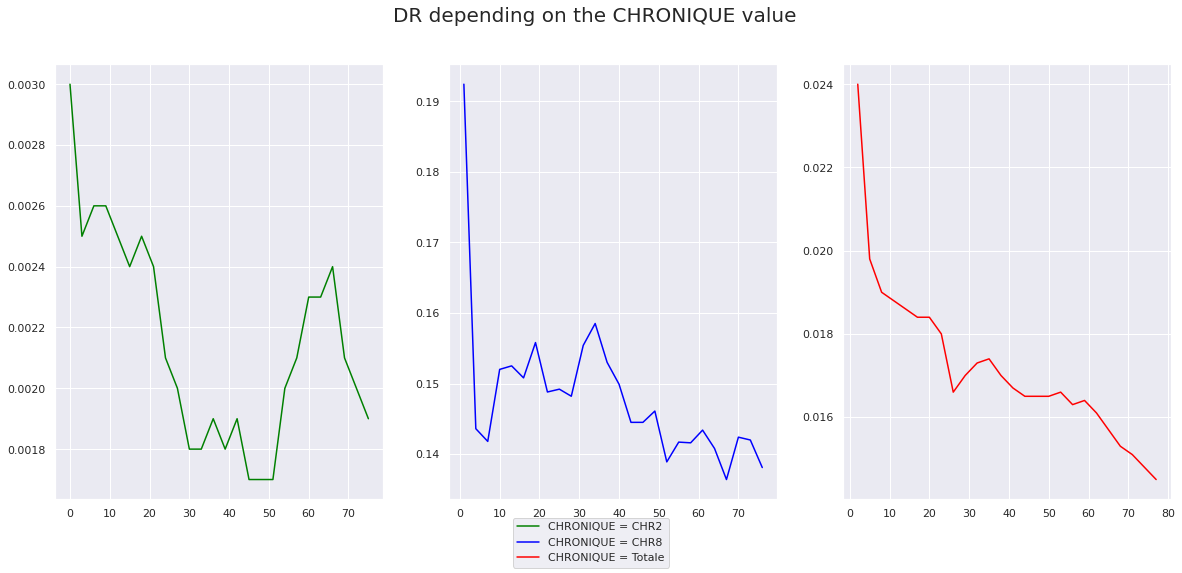

In [13]:
fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(20, 8))
 
# Labels to use in the legend for each line
line_labels = ["CHRONIQUE = CHR2","CHRONIQUE = CHR8","CHRONIQUE = Totale"]
  
# Title for subplots
plt.suptitle('DR depending on the CHRONIQUE value',fontsize=20)
  
# Creating the sub-plots.
l1 = ax1.plot(Y1,color="green")
l2 = ax2.plot(Y2,color="blue")
l3 = ax3.plot(Y3,color="red")

fig.legend([l1, l2,l3], labels=line_labels,loc="lower center")
  
# Adjusting the sub-plots
plt.subplots_adjust(right=0.9)
  
plt.show()

Remarks: At first sight, the series are not stationarity. We are doing tests to verify if it is the case or not. We recall that stationarity is important to use auto regressive models like ARIMAX models. Moreover, we see that the first period corresponding to the gobal financial crisis (2008) is different from the other period. We may have to take into account this issue.

# Focus on the First DATASET (CHRONIQUE = CHR2)

## a. Formating and general correlation

In [ ]:
# We are definining the Index as the datetime
df = data1.set_index(data1.TRIMESTRE)
df = df.drop(['TRIMESTRE','CHRONIQUE','dtf_per_trt'],axis = 1)
df.head()
Y = df.DR

In [ ]:
print(df.columns)

Index(['DR', 'mean_1', 'median_1', 'p5_1', 'p10_1', 'p25_1', 'p75_1', 'p90_1',
       'p95_1', 'mean_2', 'median_2', 'p5_2', 'p10_2', 'p25_2', 'p75_2',
       'p90_2', 'p95_2', 'mean_3', 'median_3', 'p5_3', 'p10_3', 'p25_3',
       'p75_3', 'p90_3', 'p95_3', 'mean_4', 'median_4', 'p5_4', 'p10_4',
       'p25_4', 'p75_4', 'p90_4', 'p95_4', 'mean_5', 'median_5', 'p5_5',
       'p10_5', 'p25_5', 'p75_5', 'p90_5', 'p95_5', 'mean_6', 'median_6',
       'p5_6', 'p10_6', 'p25_6', 'p75_6', 'p90_6', 'p95_6', 'mean_7',
       'median_7', 'p5_7', 'p10_7', 'p25_7', 'p75_7', 'p90_7', 'p95_7',
       'mean_8', 'median_8', 'p5_8', 'p10_8', 'p25_8', 'p75_8', 'p90_8',
       'p95_8', 'CD_TY_CLI_RCI_1', 'CD_TY_CLI_RCI_2', 'CD_ETA_CIV_1',
       'CD_ETA_CIV_2', 'CD_MOD_HABI_1', 'CD_MOD_HABI_2', 'CD_PROF_1',
       'CD_PROF_2', 'CD_PROF_3', 'CD_QUAL_VEH_1', 'CD_QUAL_VEH_2', 'PIB',
       'Inflation', 'Tx_cho'],
      dtype='object')


In [ ]:
variables = df.columns[df.columns != 'DR']
values = []
for column in variables:
  values.append(pd.DataFrame(np.array([Y1,df[column]]).T).corr().iloc[0,1])
correlation = pd.DataFrame(np.array(values).T,index = variables,columns = ["Correlation with DR"])

Remarks:
Concerning the correlation, values like "Client Type", "Type of housing", "Civil status", and "Vehicle quality code" have opposite correlation because CD_TY_CLI_RCI_1 = 1 - CD_TY_CLI_RCI_2, hence cov(CD_TY_CLI_RCI_1,DR) = - cov(CD_TY_CLI_RCI_2,DR)

## b. Analysis of each variables

### Recalculated award score
mean_1, median_1, p5_1, p10_1, p25_1, p75_1, p90_1, p95_1

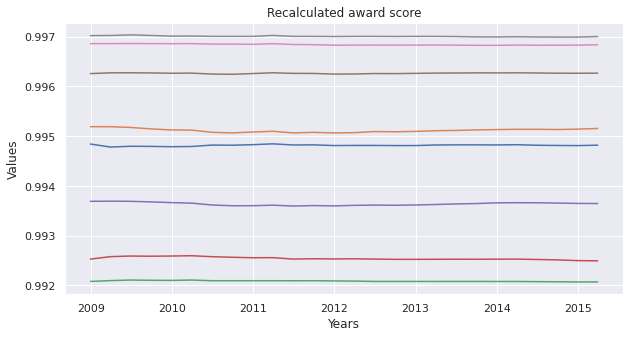

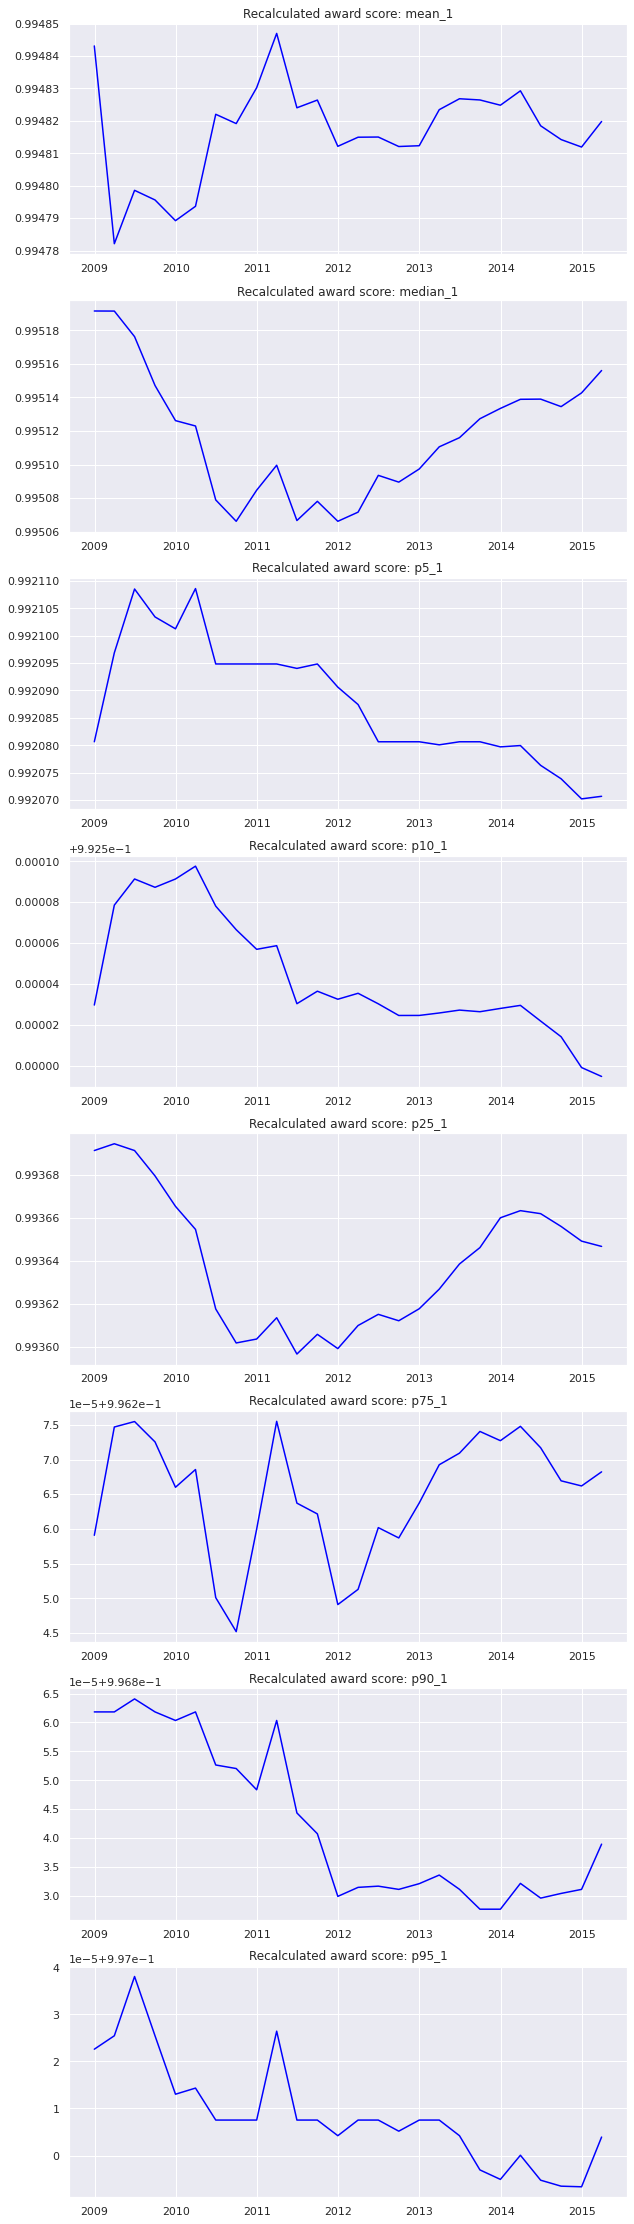

In [ ]:
col = ['mean_1', 'median_1', 'p5_1', 'p10_1', 'p25_1', 'p75_1', 'p90_1','p95_1']

fig = plt.figure(figsize = (10,5))
for i in range(8):
  f = sns.lineplot(x=df.index,y=col[i],data=df)
  f.set(xlabel='Years',ylabel='Values')
plt.title("Recalculated award score")

fig = plt.figure(figsize = (10,5*8))
for i in range(8):
  position = 811 + i
  ax = fig.add_subplot(position)
  ax.set_title(f'Recalculated award score: {col[i]}')
  ax.plot(df[col[i]], color='blue')
plt.show()

In [ ]:
correlation.loc[col]

,Correlation with DR
mean_1,-0.202734
median_1,0.614419
p5_1,0.381204
p10_1,0.564469
p25_1,0.729438
p75_1,0.145661
p90_1,0.660610
p95_1,0.435734


In [ ]:
df[col].describe()

,mean_1,median_1,p5_1,p10_1,p25_1,p75_1,p90_1,p95_1
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,0.994817,0.995117,0.992088,0.992543,0.993639,0.996265,0.996843,0.997009
std,0.000015,0.000038,0.000011,0.000029,0.000031,0.000009,0.000014,0.000011
min,0.994782,0.995066,0.992070,0.992495,0.993597,0.996245,0.996828,0.996993
25%,0.994812,0.995086,0.992080,0.992526,0.993612,0.996260,0.996831,0.997004
50%,0.994819,0.995120,0.992084,0.992530,0.993642,0.996267,0.996836,0.997008
75%,0.994826,0.995139,0.992095,0.992565,0.993661,0.996272,0.996858,0.997012
max,0.994847,0.995192,0.992109,0.992598,0.993694,0.996276,0.996864,0.997038


Remarks: No stationarity observed. Few variables have an high correlation with DR, p25_1, p90_1, median_1

### Time elapsed since last payment
mean_2, median_2, p5_2, p10_2, p25_2, p75_2, p90_2, p95_2

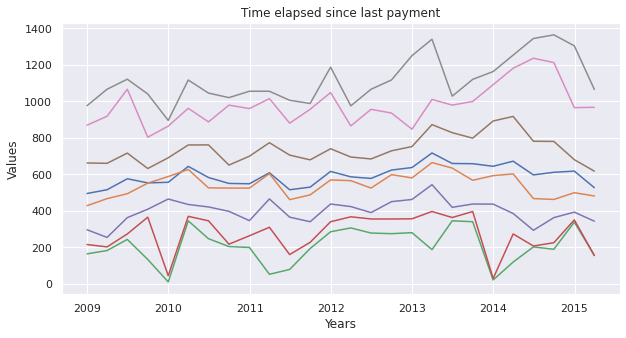

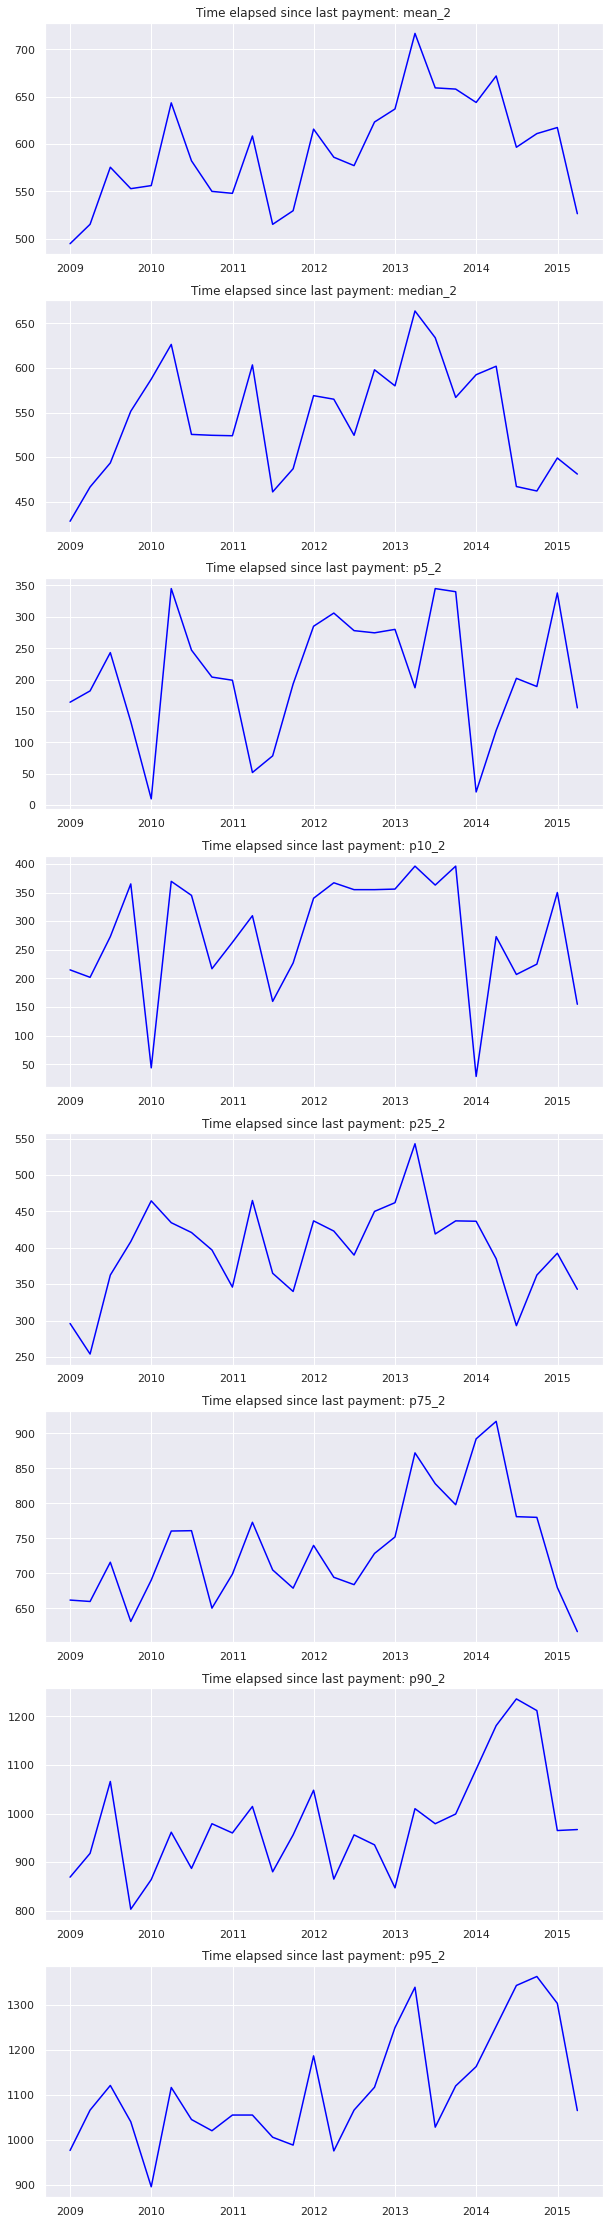

In [ ]:
col = ['mean_2', 'median_2', 'p5_2', 'p10_2', 'p25_2', 'p75_2', 'p90_2','p95_2']

fig = plt.figure(figsize = (10,5))
for i in range(8):
  f = sns.lineplot(x=df.index,y=col[i],data=df)
  f.set(xlabel='Years',ylabel='Values')
plt.title("Time elapsed since last payment")

fig = plt.figure(figsize = (10,5*8))
for i in range(8):
  position = 811 + i
  ax = fig.add_subplot(position)
  ax.set_title(f'Time elapsed since last payment: {col[i]}')
  ax.plot(df[col[i]], color='blue')
plt.show()

In [ ]:
correlation.loc[col]

,Correlation with DR
mean_2,-0.357034
median_2,-0.321691
p5_2,-0.250862
p10_2,-0.317372
p25_2,-0.421446
p75_2,-0.145855
p90_2,0.004065
p95_2,-0.225464


In [ ]:
df[col].describe()

,mean_2,median_2,p5_2,p10_2,p25_2,p75_2,p90_2,p95_2
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,592.698657,541.692308,206.538462,275.269231,397.211538,736.615385,978.826923,1113.807692
std,55.690777,62.763059,97.979174,102.214405,63.059840,78.493224,109.781778,126.907295
min,494.728814,428.000000,10.000000,29.000000,254.000000,617.000000,803.000000,895.000000
25%,550.662879,488.625000,157.250000,215.500000,362.500000,681.000000,894.750000,1031.000000
50%,591.269231,538.500000,200.500000,291.250000,402.750000,722.250000,963.250000,1066.000000
75%,633.471324,591.250000,279.500000,355.750000,436.875000,778.250000,1013.375000,1181.000000
max,716.666667,664.000000,345.000000,396.000000,543.000000,917.000000,1236.000000,1364.000000


Remarks: No stationarity observed. High absolute correlation is not observed in these datas.

### Duration of outstanding payment
mean_3, median_3, p5_3, p10_3, p25_3, p75_3, p90_3, p95_3

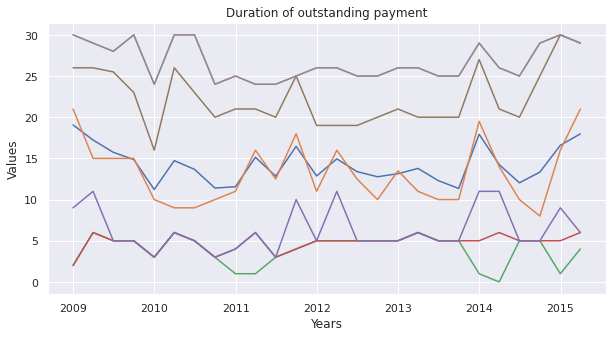

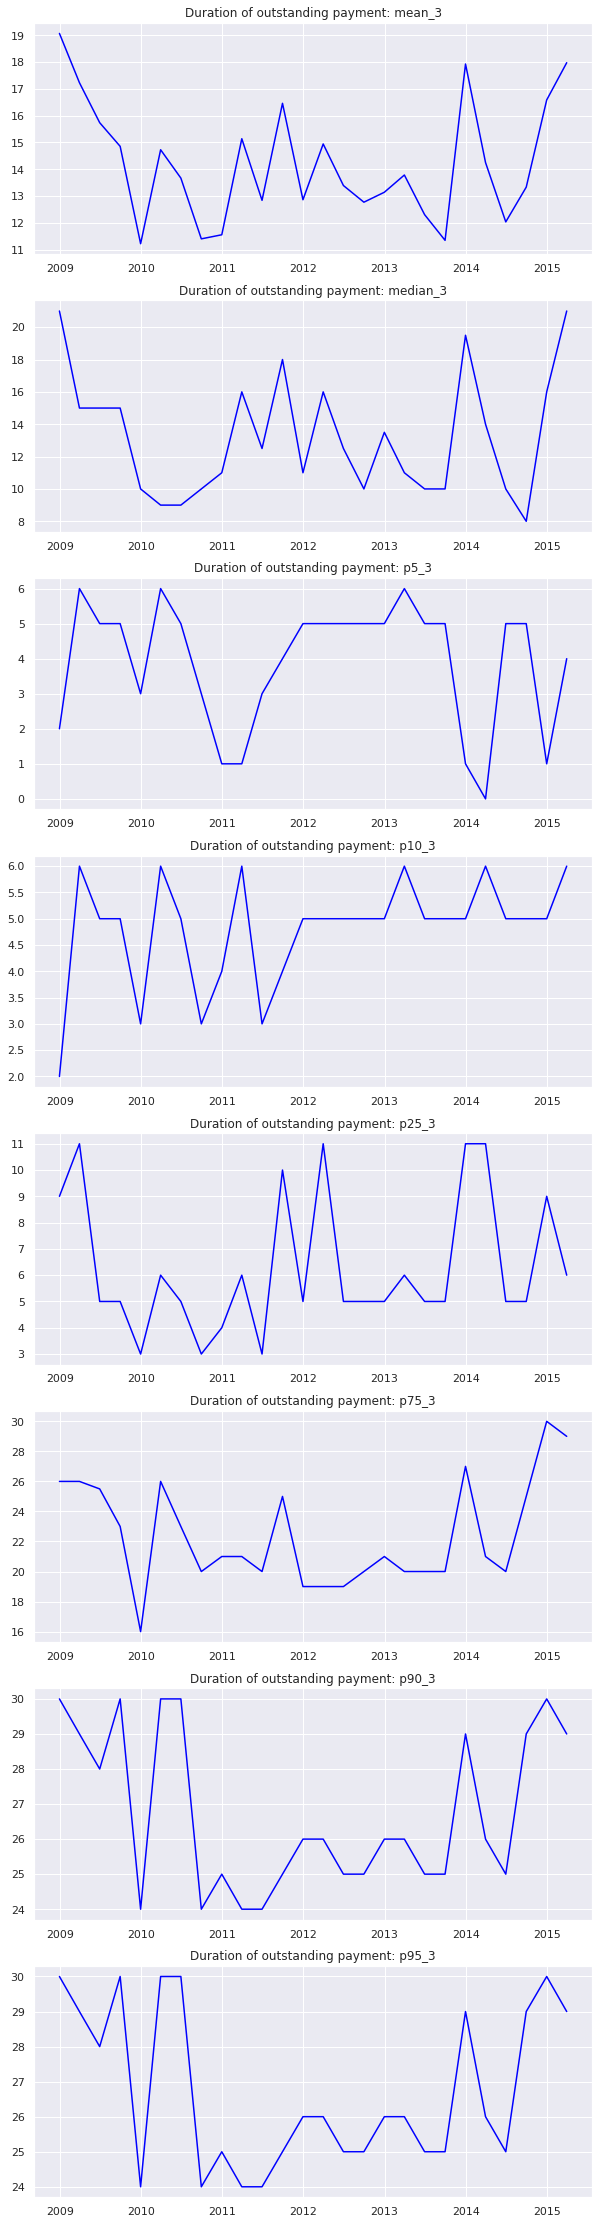

In [ ]:
col = ['mean_3', 'median_3', 'p5_3', 'p10_3', 'p25_3', 'p75_3', 'p90_3','p95_3']

fig = plt.figure(figsize = (10,5))
for i in range(8):
  f = sns.lineplot(x=df.index,y=col[i],data=df)
  f.set(xlabel='Years',ylabel='Values')
plt.title("Duration of outstanding payment")

fig = plt.figure(figsize = (10,5*8))
for i in range(8):
  position = 811 + i
  ax = fig.add_subplot(position)
  ax.set_title(f'Duration of outstanding payment: {col[i]}')
  ax.plot(df[col[i]], color='blue')
plt.show()

In [ ]:
correlation.loc[col]

,Correlation with DR
mean_3,0.251193
median_3,0.108319
p5_3,-0.136611
p10_3,-0.299519
p25_3,0.073593
p75_3,0.250590
p90_3,0.474166
p95_3,0.474166


In [ ]:
df[col].describe()

,mean_3,median_3,p5_3,p10_3,p25_3,p75_3,p90_3,p95_3
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,14.253189,13.230769,3.884615,4.807692,6.307692,22.403846,26.730769,26.730769
std,2.236530,3.782144,1.818283,1.059027,2.634680,3.515734,2.272579,2.272579
min,11.222222,8.000000,0.000000,2.000000,3.000000,16.000000,24.000000,24.000000
25%,12.788799,10.000000,3.000000,5.000000,5.000000,20.000000,25.000000,25.000000
50%,13.728022,12.500000,5.000000,5.000000,5.000000,21.000000,26.000000,26.000000
75%,15.588977,15.750000,5.000000,5.000000,8.250000,25.375000,29.000000,29.000000
max,19.070000,21.000000,6.000000,6.000000,11.000000,30.000000,30.000000,30.000000


Remarks: No stationarity observed. High absolute correlation is not observed in these datas.

### Maximum duration of unpaid invoices
mean_4, median_4, p5_4, p10_4, p25_4, p75_4, p90_4, p95_4

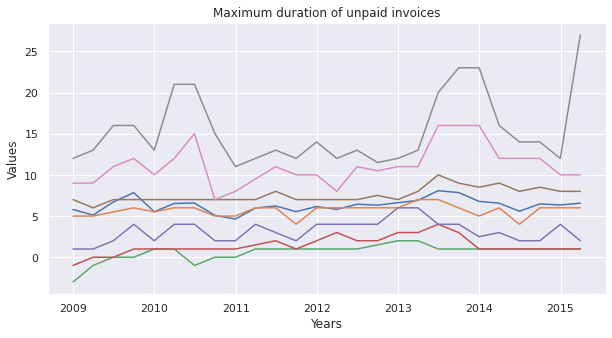

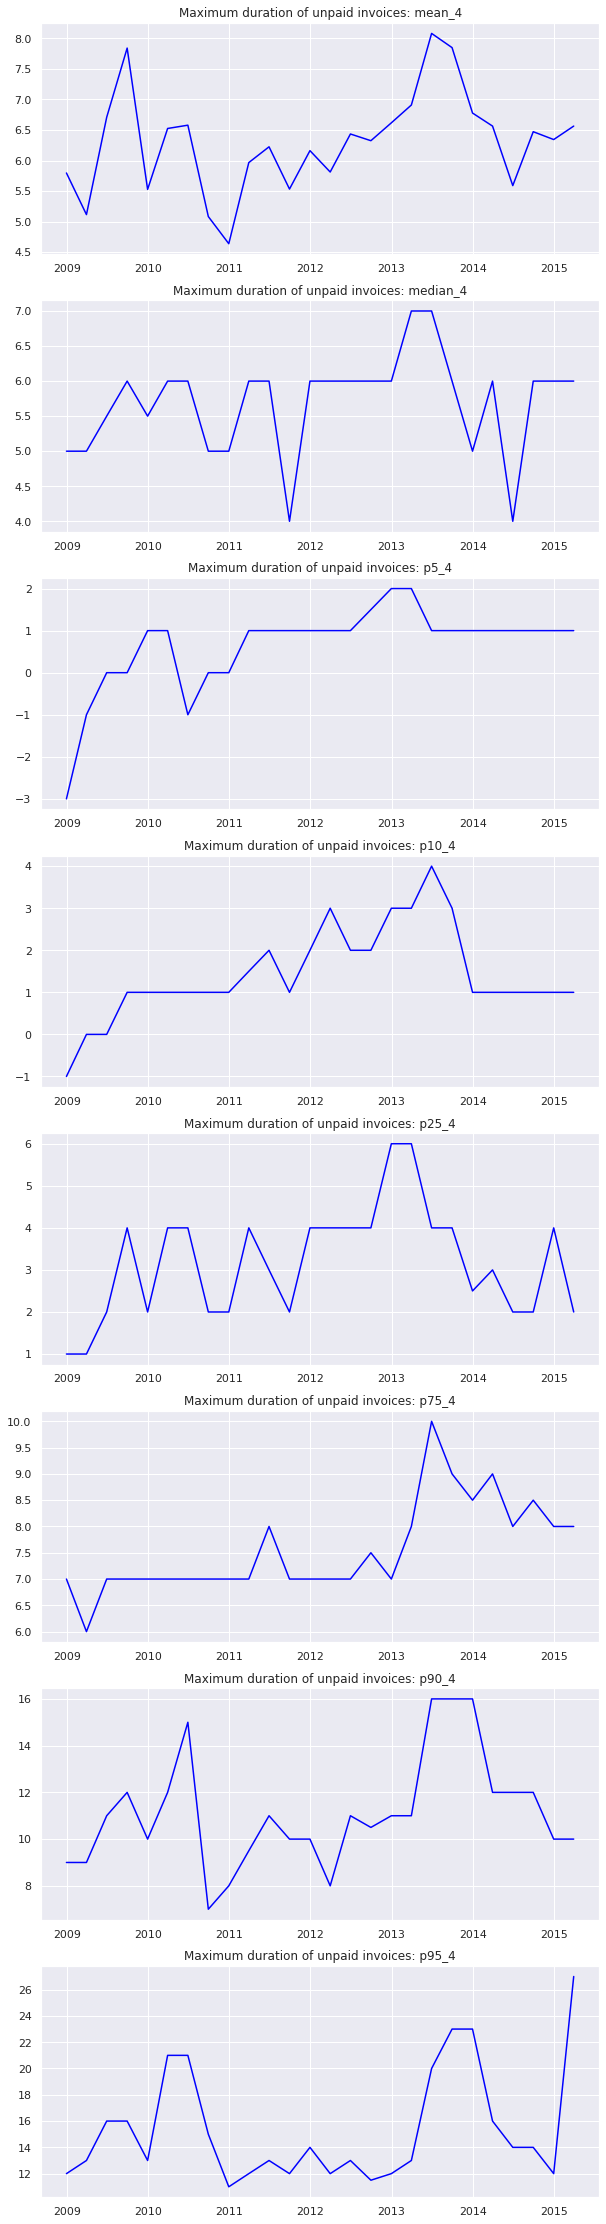

In [ ]:
col = ["mean_4", "median_4", "p5_4", "p10_4", "p25_4", "p75_4", "p90_4", "p95_4"]

fig = plt.figure(figsize = (10,5))
for i in range(8):
  f = sns.lineplot(x=df.index,y=col[i],data=df)
  f.set(xlabel='Years',ylabel='Values')
plt.title("Maximum duration of unpaid invoices")

fig = plt.figure(figsize = (10,5*8))
for i in range(8):
  position = 811 + i
  ax = fig.add_subplot(position)
  ax.set_title(f'Maximum duration of unpaid invoices: {col[i]}')
  ax.plot(df[col[i]], color='blue')
plt.show()

In [ ]:
correlation.loc[col]

,Correlation with DR
mean_4,-0.099501
median_4,-0.373032
p5_4,-0.784335
p10_4,-0.736987
p25_4,-0.569781
p75_4,-0.220137
p90_4,0.052470
p95_4,0.159788


In [ ]:
df[col].describe()

,mean_4,median_4,p5_4,p10_4,p25_4,p75_4,p90_4,p95_4
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,6.309332,5.692308,0.634615,1.442308,3.173077,7.557692,11.115385,15.365385
std,0.826696,0.722176,1.034966,1.098425,1.333734,0.886870,2.409596,4.353292
min,4.638889,4.000000,-3.000000,-1.000000,1.000000,6.000000,7.000000,11.000000
25%,5.800583,5.125000,0.250000,1.000000,2.000000,7.000000,10.000000,12.000000
50%,6.389266,6.000000,1.000000,1.000000,3.500000,7.000000,11.000000,13.500000
75%,6.607972,6.000000,1.000000,2.000000,4.000000,8.000000,12.000000,16.000000
max,8.081081,7.000000,2.000000,4.000000,6.000000,10.000000,16.000000,27.000000


Remarks: No stationarity observed. High absolute correlation is observed with p5_4, p10_4 and p25_4

### Receivable after distribution of credit balance
mean_5, median_5, p5_5, p10_5, p25_5, p75_5, p90_5, p95_5

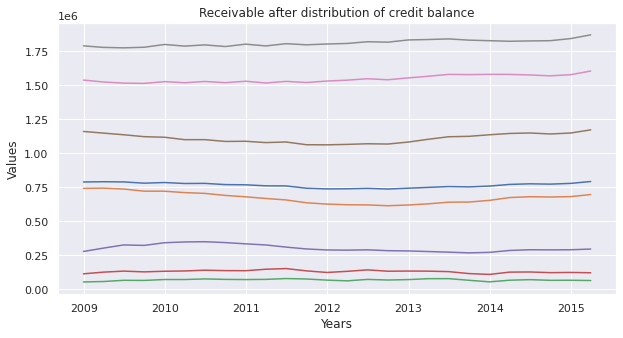

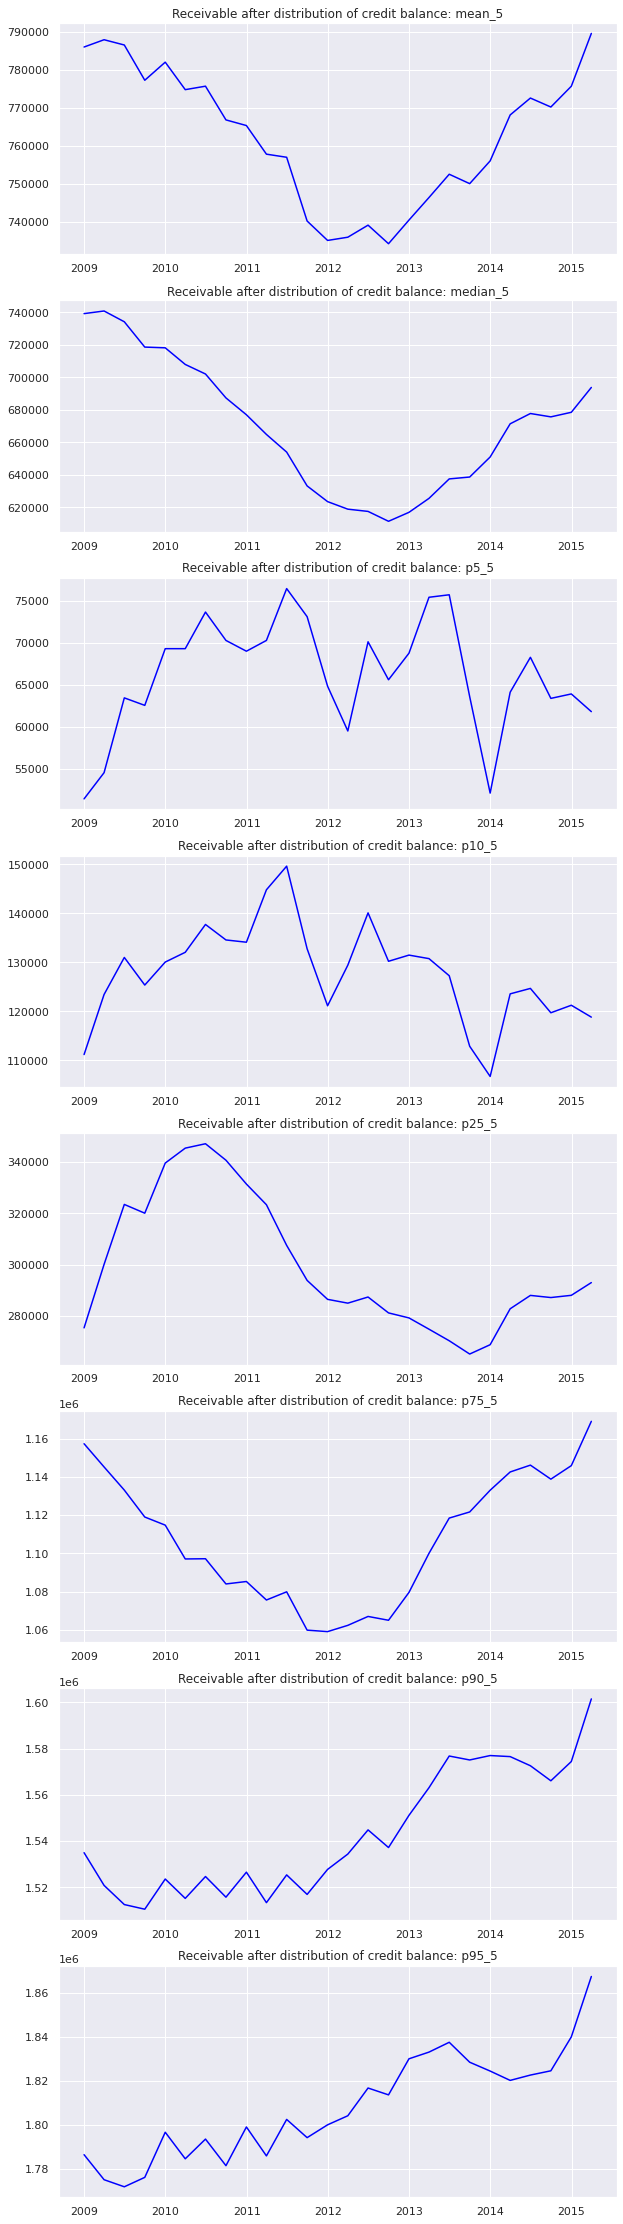

In [ ]:
col = ["mean_5", "median_5", "p5_5", "p10_5", "p25_5", "p75_5", "p90_5", "p95_5"]

fig = plt.figure(figsize = (10,5))
for i in range(8):
  f = sns.lineplot(x=df.index,y=col[i],data=df)
  f.set(xlabel='Years',ylabel='Values')
plt.title("Receivable after distribution of credit balance")

fig = plt.figure(figsize = (10,5*8))
for i in range(8):
  position = 811 + i
  ax = fig.add_subplot(position)
  ax.set_title(f'Receivable after distribution of credit balance: {col[i]}')
  ax.plot(df[col[i]], color='blue')
plt.show()

In [ ]:
correlation.loc[col]

,Correlation with DR
mean_5,0.765444
median_5,0.868619
p5_5,-0.443694
p10_5,-0.315359
p25_5,0.388881
p75_5,0.554717
p90_5,-0.271406
p95_5,-0.543813


In [ ]:
df[col].describe()

,mean_5,median_5,p5_5,p10_5,p25_5,p75_5,p90_5,p95_5
count,26.000000,26.000000,26.000000,26.000000,26.000000,2.600000e+01,2.600000e+01,2.600000e+01
mean,762431.554030,669825.326923,66142.269231,127869.596154,299418.711538,1.107552e+06,1.543041e+06,1.808051e+06
std,18139.858899,40986.452684,6737.984135,9841.930713,25683.473489,3.388156e+04,2.679764e+04,2.387877e+04
min,734218.451522,611391.000000,51392.000000,106702.000000,265184.000000,1.059015e+06,1.510580e+06,1.771888e+06
25%,747293.421150,634247.000000,63368.250000,121788.250000,281596.250000,1.079621e+06,1.521551e+06,1.788220e+06
50%,766072.994328,673547.750000,66906.000000,129739.000000,288023.000000,1.107372e+06,1.534704e+06,1.803280e+06
75%,775690.623361,700004.000000,70210.750000,132587.500000,322480.250000,1.137381e+06,1.570948e+06,1.824476e+06
max,789589.747673,740867.000000,76423.000000,149633.000000,347041.000000,1.169078e+06,1.601453e+06,1.867287e+06


Remarks: No stationarity observed. High absolute correlation is observed with mean_5, median_5

### Number of regularized incidents recorded since the date of entry into management
mean_6, median_6, p5_6, p10_6, p25_6, p75_6, p90_6, p95_6

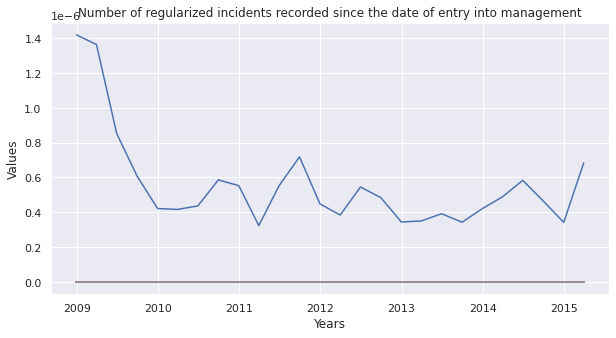

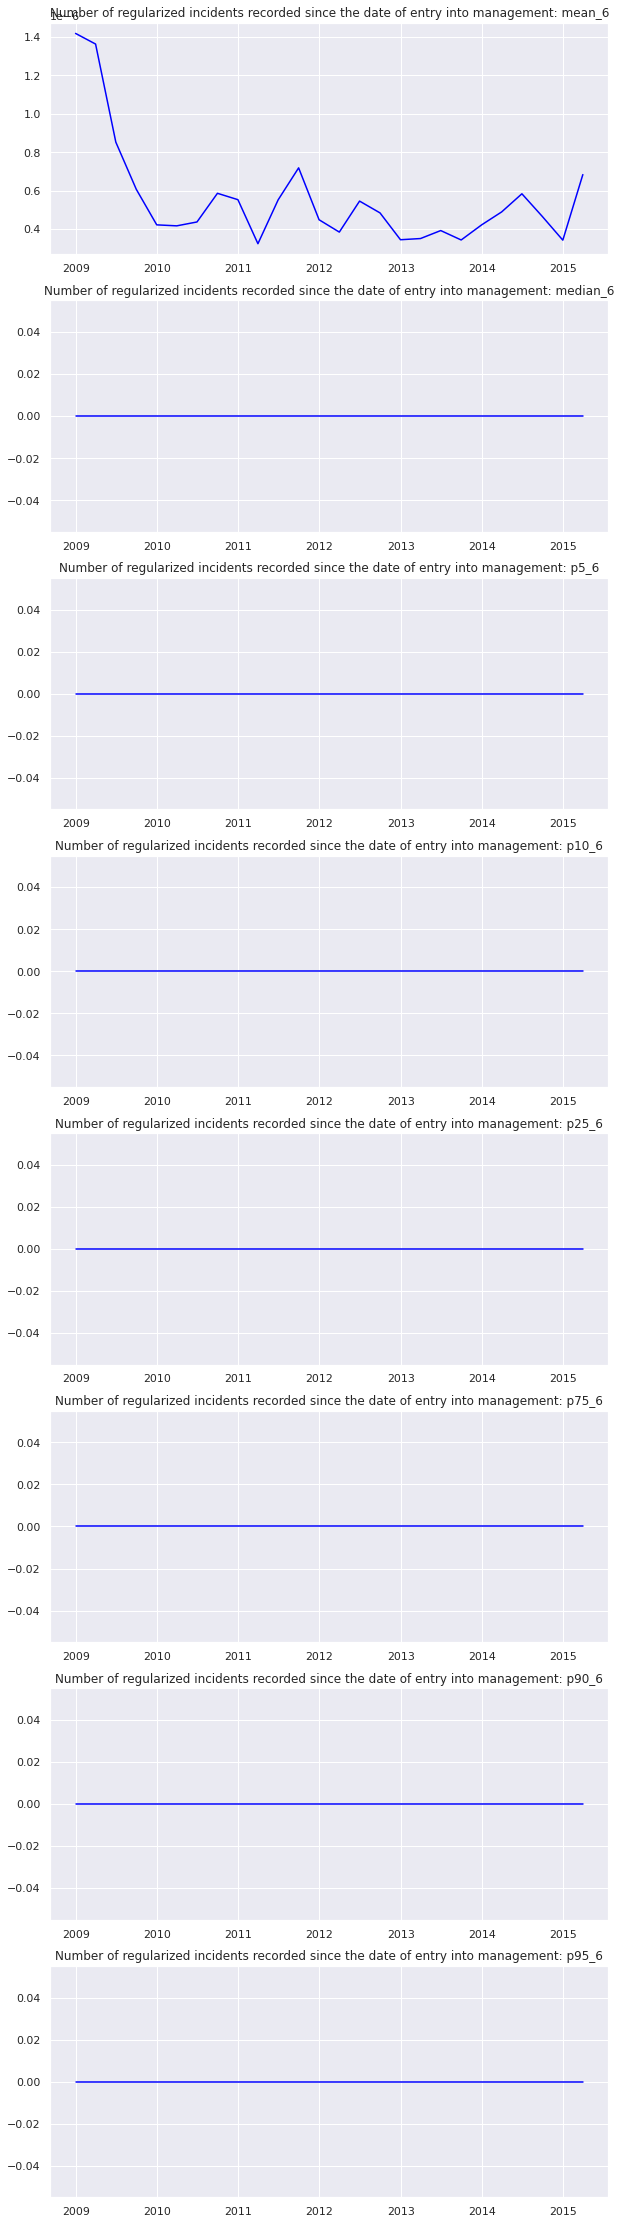

In [ ]:
col = ["mean_6", "median_6", "p5_6", "p10_6", "p25_6", "p75_6", "p90_6", "p95_6"]

fig = plt.figure(figsize = (10,5))
for i in range(8):
  f = sns.lineplot(x=df.index,y=col[i],data=df)
  f.set(xlabel='Years',ylabel='Values')
plt.title("Number of regularized incidents recorded since the date of entry into management")

fig = plt.figure(figsize = (10,5*8))
for i in range(8):
  position = 811 + i
  ax = fig.add_subplot(position)
  ax.set_title(f'Number of regularized incidents recorded since the date of entry into management: {col[i]}')
  ax.plot(df[col[i]], color='blue')
plt.show()

In [ ]:
correlation.loc[col]

,Correlation with DR
mean_6,0.571094
median_6,NaN
p5_6,NaN
p10_6,NaN
p25_6,NaN
p75_6,NaN
p90_6,NaN
p95_6,NaN


In [ ]:
df[col].describe()

,mean_6,median_6,p5_6,p10_6,p25_6,p75_6,p90_6,p95_6
count,2.600000e+01,26.0,26.0,26.0,26.0,26.0,26.0,26.0
mean,5.587784e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.771622e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,3.235422e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,3.981508e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.746368e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,5.855209e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.419174e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Remarks: Problems with data. We decided to not use these variables.

### Ratio of the rank of the first regularized payment to the expected duration of the contract
mean_7, median_7, p5_7, p10_7, p25_7, p75_7, p90_7, p95_7

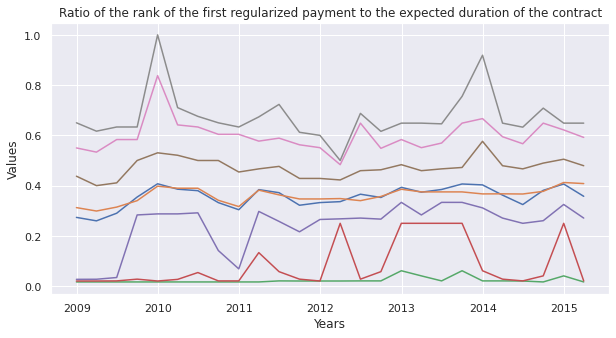

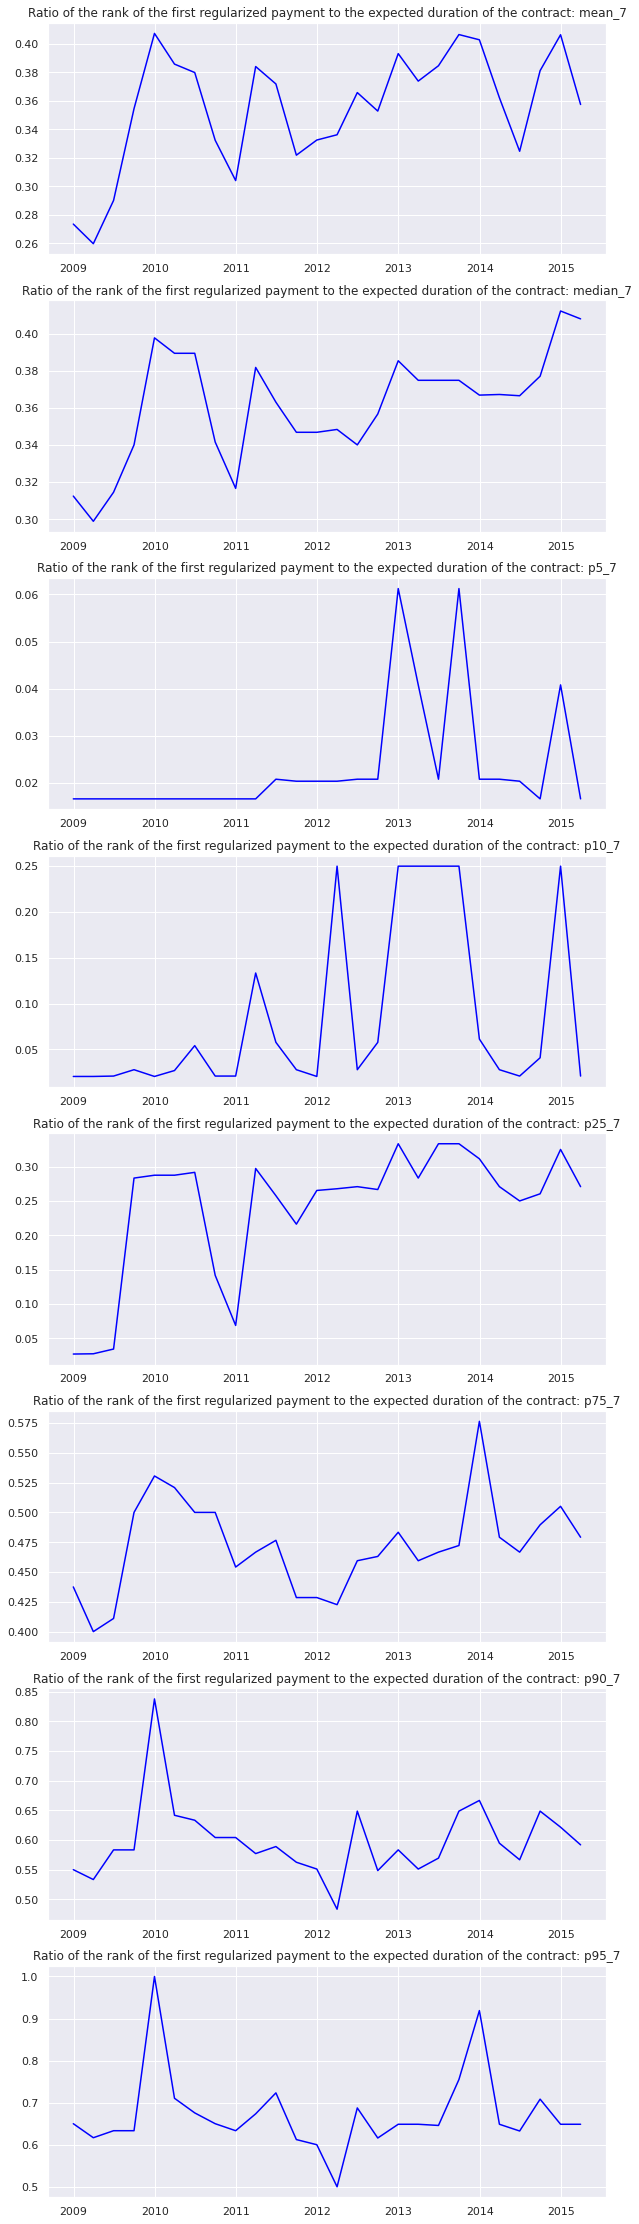

In [ ]:
col = ["mean_7", "median_7", "p5_7", "p10_7", "p25_7", "p75_7", "p90_7", "p95_7"]

fig = plt.figure(figsize = (10,5))
for i in range(8):
  f = sns.lineplot(x=df.index,y=col[i],data=df)
  f.set(xlabel='Years',ylabel='Values')
plt.title("Ratio of the rank of the first regularized payment to the expected duration of the contract")

fig = plt.figure(figsize = (10,5*8))
for i in range(8):
  position = 811 + i
  ax = fig.add_subplot(position)
  ax.set_title(f'Ratio of the rank of the first regularized payment to the expected duration of the contract: {col[i]}')
  ax.plot(df[col[i]], color='blue')
plt.show()

In [ ]:
correlation.loc[col]

,Correlation with DR
mean_7,-0.367202
median_7,-0.340522
p5_7,-0.398083
p10_7,-0.492664
p25_7,-0.512515
p75_7,0.118883
p90_7,0.249566
p95_7,0.243131


In [ ]:
df[col].describe()

,mean_7,median_7,p5_7,p10_7,p25_7,p75_7,p90_7,p95_7
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,0.355608,0.361357,0.023489,0.085711,0.240871,0.472207,0.598986,0.673819
std,0.041208,0.029672,0.012786,0.094741,0.096106,0.038894,0.064645,0.097160
min,0.259793,0.298895,0.016667,0.020408,0.027027,0.400000,0.483333,0.500000
25%,0.332397,0.342985,0.016667,0.020833,0.251913,0.455490,0.563542,0.633333
50%,0.364008,0.366837,0.020408,0.027778,0.270833,0.469444,0.586149,0.648649
75%,0.384516,0.380761,0.020833,0.115306,0.290625,0.497396,0.630405,0.684544
max,0.407336,0.412415,0.061225,0.250000,0.333333,0.576389,0.837838,1.000000


Remarks: No stationarity observed. The data is not interesting.

### Percentage contribution
mean_8, median_8, p5_8, p10_8, p25_8, p75_8, p90_8, p95_8

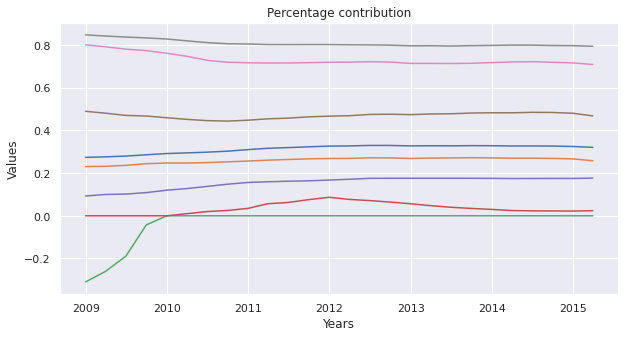

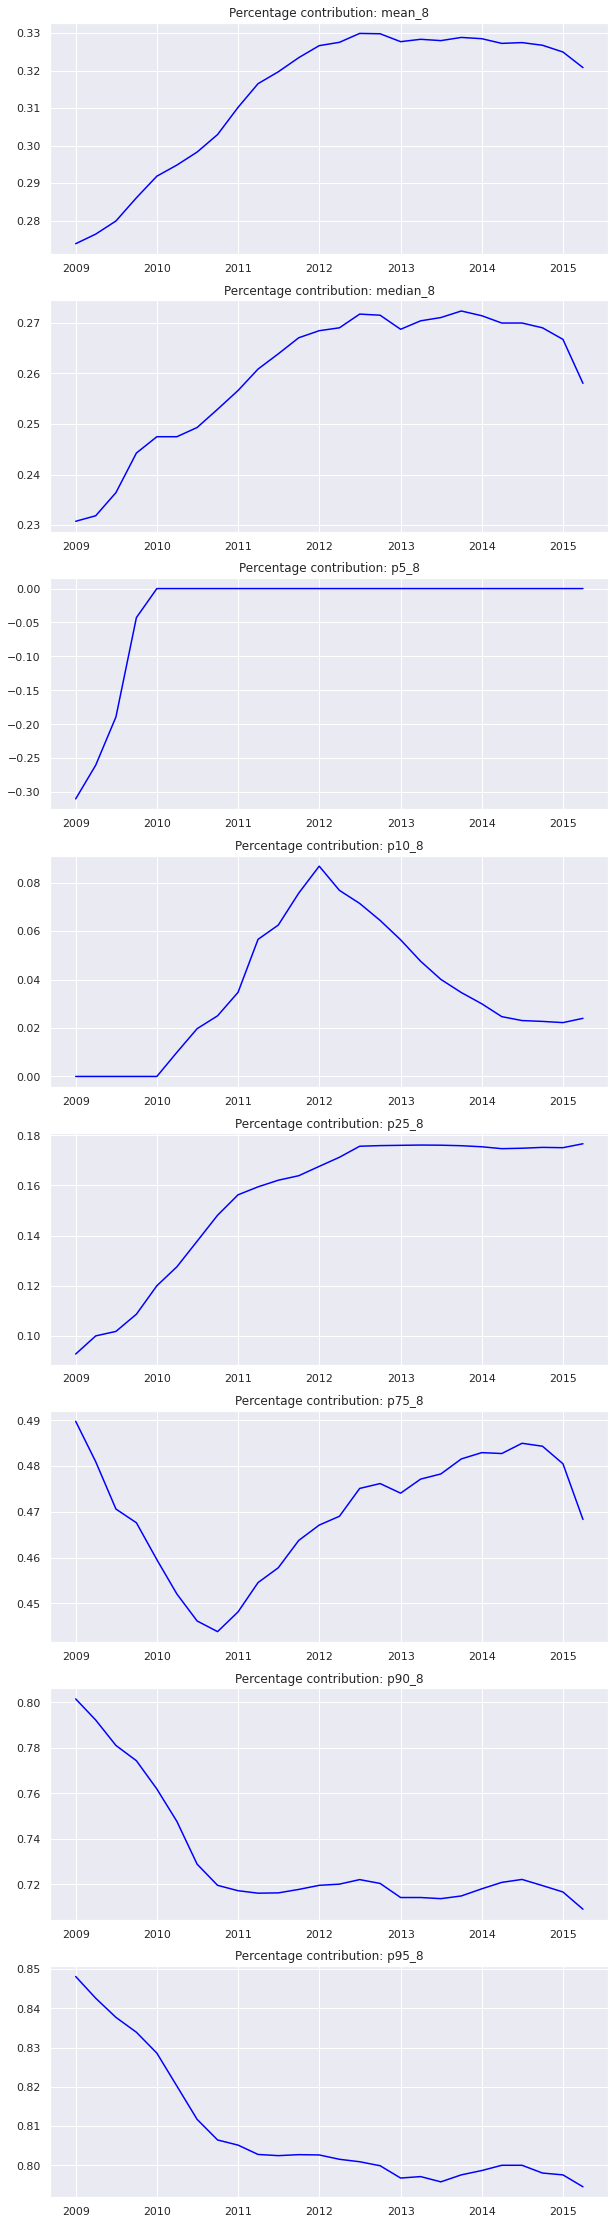

In [ ]:
col = ["mean_8", "median_8", "p5_8", "p10_8", "p25_8", "p75_8", "p90_8", "p95_8"]

fig = plt.figure(figsize = (10,5))
for i in range(8):
  f = sns.lineplot(x=df.index,y=col[i],data=df)
  f.set(xlabel='Years',ylabel='Values')
plt.title("Percentage contribution")

fig = plt.figure(figsize = (10,5*8))
for i in range(8):
  position = 811 + i
  ax = fig.add_subplot(position)
  ax.set_title(f'Percentage contribution: {col[i]}')
  ax.plot(df[col[i]], color='blue')
plt.show()

In [ ]:
correlation.loc[col]

,Correlation with DR
mean_8,-0.815473
median_8,-0.781704
p5_8,-0.629855
p10_8,-0.836450
p25_8,-0.803803
p75_8,0.022499
p90_8,0.788500
p95_8,0.797503


In [ ]:
df[col].describe()

,mean_8,median_8,p5_8,p10_8,p25_8,p75_8,p90_8,p95_8
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,0.313693,0.259903,-0.030860,0.034965,0.154784,0.469898,0.731580,0.808581
std,0.018865,0.013185,0.084084,0.026789,0.028192,0.013157,0.026792,0.015905
min,0.273811,0.230769,-0.309994,0.000000,0.092772,0.443826,0.709156,0.794521
25%,0.299424,0.250215,0.000000,0.020350,0.140345,0.460607,0.716416,0.798182
50%,0.324189,0.266901,0.000000,0.027517,0.169416,0.472356,0.719626,0.801992
75%,0.327657,0.269974,0.000000,0.056559,0.175579,0.480857,0.727248,0.810388
max,0.329902,0.272352,0.000000,0.086818,0.176624,0.489796,0.801447,0.848101


Remarks: No stationarity observed. The data is interesting. We decide to keep the mean_8, median_8 and p95_8.

### Client type
CD_TY_CLI_RCI_1 and CD_TY_CLI_RCI_2

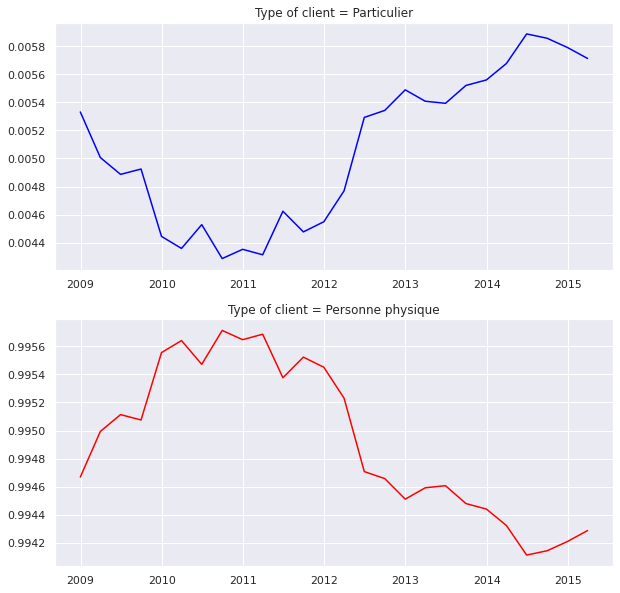

In [ ]:
fig = plt.figure(figsize = (10,10))

ax = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax.set_title('Type of client = Particulier')
ax.plot(df.CD_TY_CLI_RCI_1, color='blue')

ax2.set_title('Type of client = Personne physique')
ax2.plot(df.CD_TY_CLI_RCI_2, color='red')

plt.show()

In [ ]:
correlation.loc[["CD_TY_CLI_RCI_1","CD_TY_CLI_RCI_2"]]

,Correlation with DR
CD_TY_CLI_RCI_1,-0.108402
CD_TY_CLI_RCI_2,0.108402


In [ ]:
df[["CD_TY_CLI_RCI_1","CD_TY_CLI_RCI_2"]].describe()

,CD_TY_CLI_RCI_1,CD_TY_CLI_RCI_2
count,26.000000,26.000000
mean,0.005068,0.994932
std,0.000547,0.000547
min,0.004287,0.994113
25%,0.004533,0.994488
50%,0.005149,0.994851
75%,0.005512,0.995467
max,0.005887,0.995713


Remarks: the majority of client type is "Personne physique". This value doesn't fluctuate a lot and it is always above 99%. Maybe that this variable is not usefull for our model

### Type of housing
CD_MOD_HABI_1 and CD_MOD_HABI_2

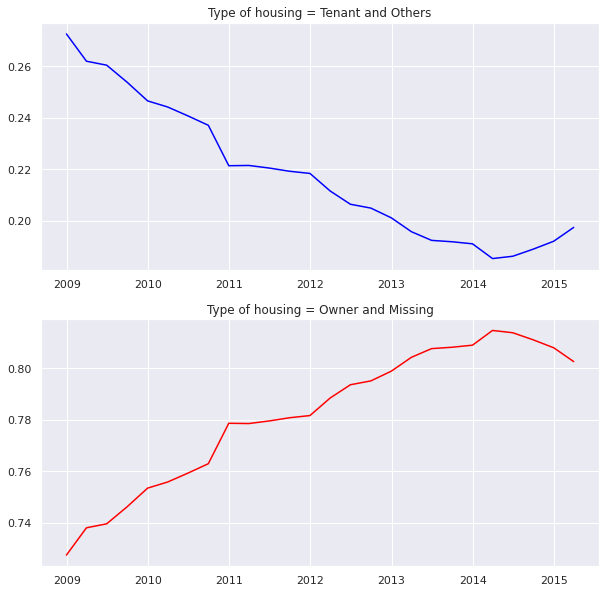

In [ ]:
fig = plt.figure(figsize = (10,10))

ax = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax.set_title('Type of housing = Tenant and Others')
ax.plot(df.CD_MOD_HABI_1, color='blue')

ax2.set_title('Type of housing = Owner and Missing')
ax2.plot(df.CD_MOD_HABI_2, color='red')

plt.show()

In [ ]:
correlation.loc[["CD_MOD_HABI_1","CD_MOD_HABI_2"]]

,Correlation with DR
CD_MOD_HABI_1,0.663205
CD_MOD_HABI_2,-0.663205


In [ ]:
df[["CD_MOD_HABI_1","CD_MOD_HABI_2"]].describe()

,CD_MOD_HABI_1,CD_MOD_HABI_2
count,26.000000,26.000000
mean,0.217764,0.782236
std,0.026521,0.026521
min,0.185294,0.727543
25%,0.193192,0.760248
50%,0.214917,0.785083
75%,0.239752,0.806808
max,0.272457,0.814706


Remarks: More and more people are becoming owner. The correlation with DR is high, this variable may be use for the model.

### Civil status
CD_ETA_CIV_1 and CD_ETA_CIV_2

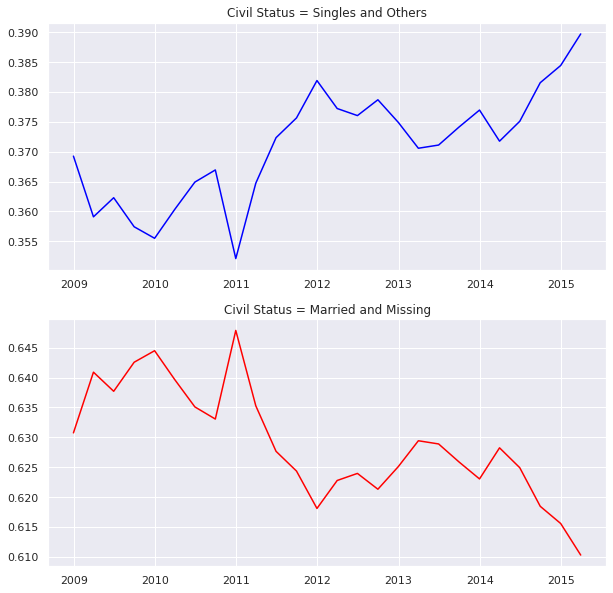

In [ ]:
fig = plt.figure(figsize = (10,10))

ax = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax.set_title('Civil Status = Singles and Others')
ax.plot(df.CD_ETA_CIV_1, color='blue')

ax2.set_title('Civil Status = Married and Missing')
ax2.plot(df.CD_ETA_CIV_2, color='red')

plt.show()

In [ ]:
correlation.loc[["CD_ETA_CIV_1","CD_ETA_CIV_2"]]

,Correlation with DR
CD_ETA_CIV_1,-0.541476
CD_ETA_CIV_2,0.541476


In [ ]:
df[["CD_ETA_CIV_1","CD_ETA_CIV_2"]].describe()

,CD_ETA_CIV_1,CD_ETA_CIV_2
count,26.000000,26.000000
mean,0.370950,0.629050
std,0.009364,0.009364
min,0.352121,0.610296
25%,0.364778,0.623265
50%,0.372053,0.627947
75%,0.376735,0.635222
max,0.389704,0.647879


Remarks: High correlation with DR. Interesting variable to use.

### Vehicle quality code
CD_QUAL_VEH_1 and CD_QUAL_VEH_2

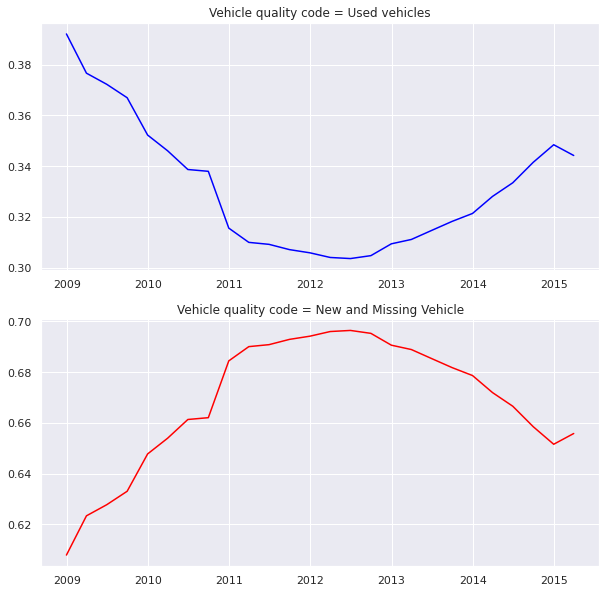

In [ ]:
fig = plt.figure(figsize = (10,10))

ax = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax.set_title('Vehicle quality code = Used vehicles')
ax.plot(df.CD_QUAL_VEH_1, color='blue')

ax2.set_title('Vehicle quality code = New and Missing Vehicle')
ax2.plot(df.CD_QUAL_VEH_2, color='red')

plt.show()

In [ ]:
correlation.loc[["CD_QUAL_VEH_1","CD_QUAL_VEH_2"]]

,Correlation with DR
CD_QUAL_VEH_1,0.853933
CD_QUAL_VEH_2,-0.853933


In [ ]:
df[["CD_QUAL_VEH_1","CD_QUAL_VEH_2"]].describe()

,CD_QUAL_VEH_1,CD_QUAL_VEH_2
count,26.000000,26.000000
mean,0.331308,0.668692
std,0.025389,0.025389
min,0.303609,0.607871
25%,0.309561,0.654387
50%,0.324743,0.675257
75%,0.345613,0.690439
max,0.392129,0.696391


Remarks: Very high correlation. This variable will be used in our model.

### Profession
CD_PROF_1, CD_PROF_2 and CD_PROF_3

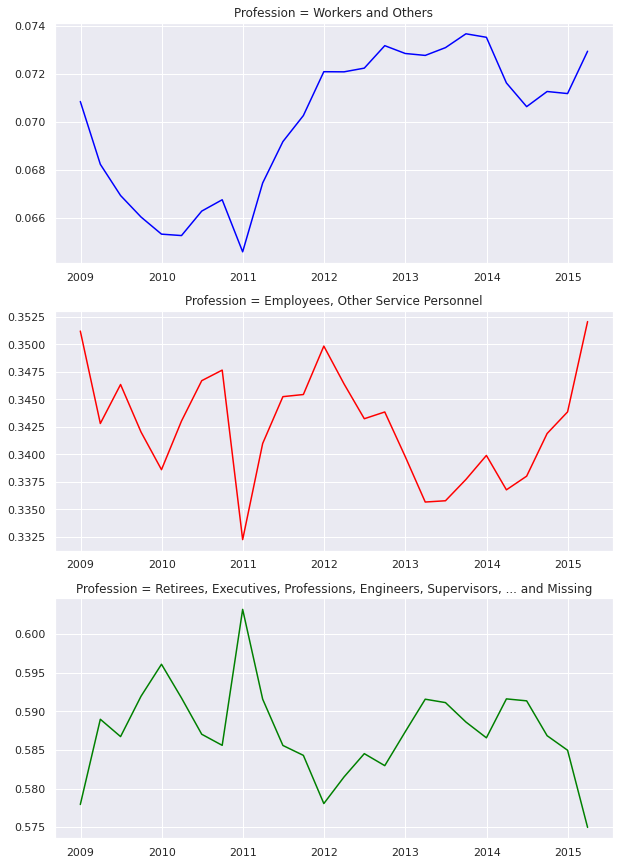

In [ ]:
fig = plt.figure(figsize = (10,15))

ax = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ax.set_title('Profession = Workers and Others')
ax.plot(df.CD_PROF_1, color='blue')

ax2.set_title('Profession = Employees, Other Service Personnel')
ax2.plot(df.CD_PROF_2, color='red')


ax3.set_title('Profession = Retirees, Executives, Professions, Engineers, Supervisors, ... and Missing')
ax3.plot(df.CD_PROF_3, color='green')

plt.show()

In [ ]:
correlation.loc[["CD_PROF_1","CD_PROF_2","CD_PROF_3"]]

,Correlation with DR
CD_PROF_1,-0.528263
CD_PROF_2,0.137722
CD_PROF_3,0.152507


In [ ]:
df[["CD_PROF_1","CD_PROF_2","CD_PROF_3"]].describe()

,CD_PROF_1,CD_PROF_2,CD_PROF_3
count,26.000000,26.000000,26.000000
mean,0.070012,0.342579,0.587409
std,0.003003,0.004990,0.005894
min,0.064568,0.332233,0.574967
25%,0.067053,0.338897,0.584626
50%,0.071018,0.342916,0.586934
75%,0.072646,0.346124,0.591514
max,0.073682,0.352079,0.603199


Remarks: Correlation is not interesting with value CD_PROF_2 and CD_PROF_3. This is not the case with CD_PROF_1.

GLOBAL REMARK CONCERNING THE VARIABLES:
For our first model we will keep these variables:
* CD_MOD_HABI_1
* CD_ETA_CIV_2
* CD_QUAL_VEH_1
* CD_PROF_1

## c. Basic model


In [ ]:
X = df[["CD_MOD_HABI_1","CD_ETA_CIV_2","CD_QUAL_VEH_1","CD_PROF_1","mean_8","median_8","p95_8","mean_5","median_5","p5_4","p10_4","p25_4","p25_1","p90_1","median_1"]]
X_train, X_test, y_train, y_test = train_test_split(X,1e4*Y,test_size=0.20,shuffle=False)

In [ ]:
XGB = xgb.XGBRegressor(n_estimators=500,max_depth=5,verbose=1)
XGB.fit(X_train,y_train)

[08:02:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=5, n_estimators=500, verbose=1)

In [ ]:
y_pred = pd.DataFrame(XGB.predict(X_test),index = y_test.index,columns = ["y_pred"])

In [ ]:
# Poor model
y_pred

,y_pred
TRIMESTRE,
2013-12-31,20.916914
2014-03-31,20.595058
2014-06-30,20.591560
2014-09-30,20.605494
2014-12-31,21.552126
2015-03-31,21.835180


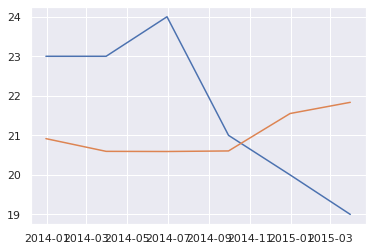

In [ ]:
plt.plot(y_test)
plt.plot(y_pred)

# Focus on the Second DATASET (CHRONIQUE = CHR8)

In [ ]:
data2.shape

(26, 82)

In [ ]:
data2.head()

,TRIMESTRE,CHRONIQUE,DR,mean_1,median_1,p5_1,p10_1,p25_1,p75_1,p90_1,...,CD_MOD_HABI_2,CD_PROF_1,CD_PROF_2,CD_PROF_3,CD_QUAL_VEH_1,CD_QUAL_VEH_2,dtf_per_trt,PIB,Inflation,Tx_cho
1,2008-12-31,b'CHR8',0.1924,0.945694,0.953968,0.870889,0.890246,0.924743,0.976024,0.990229,...,0.320747,0.181759,0.541801,0.276439,0.548512,0.451488,b'Q42008',497736.0,1.760576,7.800000
4,2009-03-31,b'CHR8',0.1436,0.947787,0.956417,0.870889,0.893328,0.927447,0.978988,0.991735,...,0.346455,0.177304,0.532900,0.289797,0.543935,0.456065,b'Q12009',489227.0,0.624887,8.600000
7,2009-06-30,b'CHR8',0.1418,0.949647,0.958201,0.873729,0.896533,0.929212,0.980143,0.992275,...,0.359461,0.175250,0.534307,0.290442,0.534792,0.465208,b'Q22009',488744.0,-0.206626,9.133333
10,2009-09-30,b'CHR8',0.1520,0.950881,0.958638,0.877809,0.901456,0.930670,0.980026,0.992186,...,0.360740,0.174804,0.535775,0.289421,0.532934,0.467066,b'Q32009',489557.0,-0.423247,9.166667
13,2009-12-31,b'CHR8',0.1525,0.950178,0.957925,0.879285,0.901501,0.930779,0.979186,0.991616,...,0.348901,0.170749,0.546034,0.283217,0.529259,0.470741,b'Q42009',492638.0,0.364611,9.533333


In [ ]:
data2.columns

Index(['TRIMESTRE', 'CHRONIQUE', 'DR', 'mean_1', 'median_1', 'p5_1', 'p10_1',
       'p25_1', 'p75_1', 'p90_1', 'p95_1', 'mean_2', 'median_2', 'p5_2',
       'p10_2', 'p25_2', 'p75_2', 'p90_2', 'p95_2', 'mean_3', 'median_3',
       'p5_3', 'p10_3', 'p25_3', 'p75_3', 'p90_3', 'p95_3', 'mean_4',
       'median_4', 'p5_4', 'p10_4', 'p25_4', 'p75_4', 'p90_4', 'p95_4',
       'mean_5', 'median_5', 'p5_5', 'p10_5', 'p25_5', 'p75_5', 'p90_5',
       'p95_5', 'mean_6', 'median_6', 'p5_6', 'p10_6', 'p25_6', 'p75_6',
       'p90_6', 'p95_6', 'mean_7', 'median_7', 'p5_7', 'p10_7', 'p25_7',
       'p75_7', 'p90_7', 'p95_7', 'mean_8', 'median_8', 'p5_8', 'p10_8',
       'p25_8', 'p75_8', 'p90_8', 'p95_8', 'CD_TY_CLI_RCI_1',
       'CD_TY_CLI_RCI_2', 'CD_ETA_CIV_1', 'CD_ETA_CIV_2', 'CD_MOD_HABI_1',
       'CD_MOD_HABI_2', 'CD_PROF_1', 'CD_PROF_2', 'CD_PROF_3', 'CD_QUAL_VEH_1',
       'CD_QUAL_VEH_2', 'dtf_per_trt', 'PIB', 'Inflation', 'Tx_cho'],
      dtype='object')

## Données sous la forme statistique

### Tracé du taux de défaut en fonction de la répartition du reste de données

Pour CHR2, nous allons avoir besoin d'une liste des données que nous allons analyser.

In [ ]:
colonnes = [['mean_1', 'median_1', 'p5_1', 'p10_1', 'p25_1', 'p75_1', 'p90_1', 'p95_1']]

for i in range(2, 9):
  L = list()
  for elt in colonnes[0]:
    L.append(elt[:len(elt)-1]+str(i))
  colonnes.append(L)

Traçons le taux de défaut en fonction de chaque données disponible dans le data set.

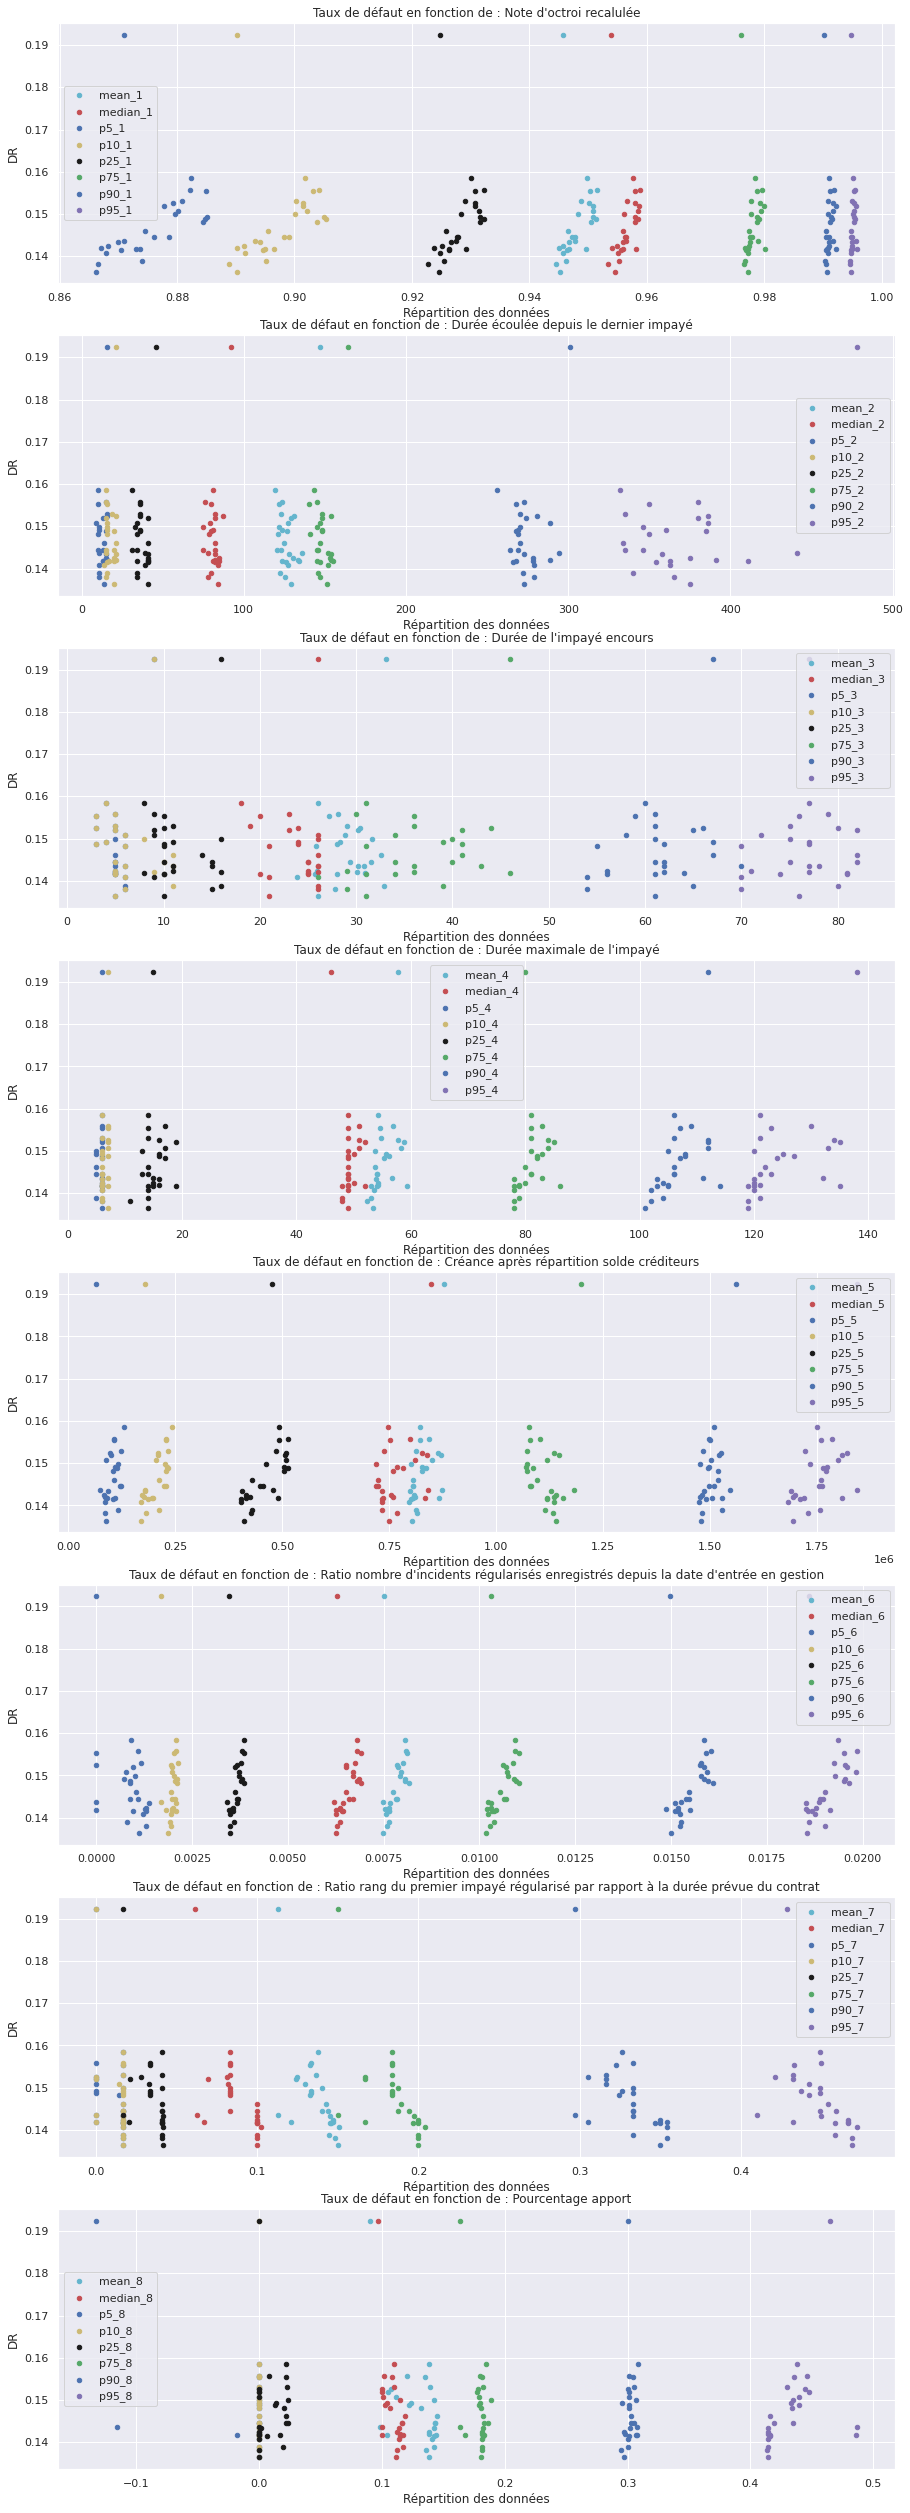

In [ ]:
fig, axes = plt.subplots(nrows=8, figsize=(15,45))

List_type_data = ["Note d'octroi recalulée",
                  "Durée écoulée depuis le dernier impayé",
                  "Durée de l'impayé encours",
                  "Durée maximale de l'impayé",
                  "Créance après répartition solde créditeurs",
                  "Ratio nombre d'incidents régularisés enregistrés depuis la date d'entrée en gestion",
                  "Ratio rang du premier impayé régularisé par rapport à la durée prévue du contrat",
                  "Pourcentage apport"]

ax_number=0

for elt in colonnes:
  data2_bis = data2[elt+["DR"]]
  for j in range(len(elt)):
    color = ["c", "r", "b", "y", "k", "g", "b", "m"]
    data2_bis.plot(ax=axes[ax_number],
                    kind="scatter", 
                    grid = True, 
                    x=elt[j], y="DR",
                    color=color[j],
                    legend=True,
                    label=elt[j],
                    title="Taux de défaut en fonction de : " +List_type_data[ax_number])
    
  axes[ax_number].set_xlabel("Répartition des données")

  ax_number += 1

## Analyse de la corrélation

Désormais, nous allons analyser la corrélation entre les données et le taux de défaut :

### Note d'octroi recalulée

In [ ]:
data2_analyse_1 = data2[colonnes[0]+["DR"]]

In [ ]:
correlation_1 = data2_analyse_1.corr()["DR"][:-1].to_frame()
correlation_1 = correlation_1.rename(columns={"DR" : "Correlation avec DR"})
correlation_1 = correlation_1.sort_values(by = "Correlation avec DR", ascending = False)
correlation_1

,Correlation avec DR
p5_1,0.313623
mean_1,0.251319
p25_1,0.239825
p10_1,0.200376
median_1,0.130393
p95_1,0.118736
p75_1,0.011890
p90_1,-0.045694


La corrélation la plus élevée est pour le quantile à 5%. Regardons la valeur des données.

In [ ]:
data2[["p5_1", "DR"]].T

,1,4,7,10,13,16,19,22,25,28,...,49,52,55,58,61,64,67,70,73,76
p5_1,0.870889,0.870889,0.873729,0.877809,0.879285,0.880151,0.88227,0.884742,0.885123,0.884392,...,0.874507,0.874012,0.872971,0.870456,0.869942,0.867919,0.866224,0.868321,0.867099,0.866626
DR,0.192400,0.143600,0.141800,0.152000,0.152500,0.150800,0.15580,0.148800,0.149200,0.148200,...,0.146100,0.138900,0.141700,0.141600,0.143400,0.140800,0.136400,0.142400,0.142000,0.138100


Regardons la valeur moyenne des quantiles à 5%

In [ ]:
print("La moyenne des quantiles à 5% vaut",float(data2[["p5_1"]].mean()))

La moyenne des quantiles à 5% vaut 0.8757586507692307


Le quantile à 5% de la note d'octroi recalculée est assez corrélée avec le taux de défaut.

### Durée écoulée depuis le dernier impayé

In [ ]:
data2_analyse_2 = data2[colonnes[1]+["DR"]]

In [ ]:
correlation_2 = data2_analyse_2.corr()["DR"][:-1].to_frame()
correlation_2 = correlation_2.rename(columns={"DR" : "Correlation avec DR"})
correlation_2 = correlation_2.sort_values(by = "Correlation avec DR", ascending = False)
correlation_2

,Correlation avec DR
p95_2,0.476737
mean_2,0.426791
median_2,0.408726
p75_2,0.324375
p90_2,0.323834
p25_2,0.217736
p5_2,0.197951
p10_2,0.130834


Analysons les quantiles à 95% de la durée écoulé depuis le dernier impayé

In [ ]:
data2[["p95_2", "DR"]].T

,1,4,7,10,13,16,19,22,25,28,...,49,52,55,58,61,64,67,70,73,76
p95_2,478.0000,441.0000,411.0000,380.000,386.0000,386.0000,380.0000,385.0000,360.0000,350.0000,...,333.5000,340.0000,363.0000,354.0000,358.0000,363.0000,375.0000,375.0000,391.000,365.0000
DR,0.1924,0.1436,0.1418,0.152,0.1525,0.1508,0.1558,0.1488,0.1492,0.1482,...,0.1461,0.1389,0.1417,0.1416,0.1434,0.1408,0.1364,0.1424,0.142,0.1381


In [ ]:
print("La moyenne des quantiles à 95% vaut",float(data2[["p95_2"]].mean()))

La moyenne des quantiles à 95% vaut 369.9423076923077


### Durée de l'impayé encours

In [ ]:
data2_analyse_3 = data2[colonnes[2]+["DR"]]
correlation_3 = data2_analyse_3.corr()["DR"][:-1].to_frame()
correlation_3 = correlation_3.rename(columns={"DR" : "Correlation avec DR"})
correlation_3 = correlation_3.sort_values(by = "Correlation avec DR", ascending = False)
correlation_3

,Correlation avec DR
p75_3,0.368712
p5_3,0.349525
p90_3,0.293494
mean_3,0.285198
p95_3,0.095248
p25_3,0.084881
p10_3,-0.018643
median_3,-0.066700


In [ ]:
data2[["p75_3", "DR"]].T

,1,4,7,10,13,16,19,22,25,28,...,49,52,55,58,61,64,67,70,73,76
p75_3,46.0000,43.0000,46.0000,41.000,44.0000,34.0000,30.0000,41.0000,39.0000,31.0000,...,41.0000,39.0000,34.0000,31.0000,36.0000,26.0000,31.0000,29.0000,36.000,29.0000
DR,0.1924,0.1436,0.1418,0.152,0.1525,0.1508,0.1558,0.1488,0.1492,0.1482,...,0.1461,0.1389,0.1417,0.1416,0.1434,0.1408,0.1364,0.1424,0.142,0.1381


In [ ]:
print("La moyenne des quantiles à 75% vaut",float(data2[["p75_3"]].mean()))

La moyenne des quantiles à 75% vaut 36.30769230769231


Étrange plus la durée de l'impayé en cours augmente plus on penserait que le risque de défaut augmente. Cependant ce n'est pas visiblement le cas.

### Durée maximale de l'impayé

In [ ]:
data2_analyse_4 = data2[colonnes[3]+["DR"]]
correlation_4 = data2_analyse_4.corr()["DR"][:-1].to_frame()
correlation_4 = correlation_4.rename(columns={"DR" : "Correlation avec DR"})
correlation_4 = correlation_4.sort_values(by = "Correlation avec DR", ascending = False)
correlation_4

,Correlation avec DR
p95_4,0.560800
p90_4,0.510760
mean_4,0.451364
p10_4,0.358553
p75_4,0.229359
p25_4,0.139667
p5_4,0.113107
median_4,-0.259373


In [ ]:
data2[["p95_4", "DR"]].T

,1,4,7,10,13,16,19,22,25,28,...,49,52,55,58,61,64,67,70,73,76
p95_4,138.0000,132.0000,135.0000,135.000,134.0000,133.0000,130.0000,127.0000,125.0000,124.0000,...,122.0000,121.0000,120.0000,119.0000,120.0000,120.0000,119.0000,120.0000,121.000,119.0000
DR,0.1924,0.1436,0.1418,0.152,0.1525,0.1508,0.1558,0.1488,0.1492,0.1482,...,0.1461,0.1389,0.1417,0.1416,0.1434,0.1408,0.1364,0.1424,0.142,0.1381


In [ ]:
print("La moyenne des quantiles à 95% vaut",float(data2[["p95_4"]].mean()))

La moyenne des quantiles à 95% vaut 124.73076923076923


On remarque que plus la durée maximale de l'impayé augmente, plus la corrélation avec le taux de défaut augmente. Ce à quoi nous devions nous attendre.

### Créance après répartition solde créditeurs

In [ ]:
data2_analyse_5 = data2[colonnes[4]+["DR"]]
correlation_5 = data2_analyse_5.corr()["DR"][:-1].to_frame()
correlation_5 = correlation_5.rename(columns={"DR" : "Correlation avec DR"})
correlation_5 = correlation_5.sort_values(by = "Correlation avec DR", ascending = False)
correlation_5

,Correlation avec DR
p95_5,0.540100
mean_5,0.522606
p90_5,0.515231
p25_5,0.480871
median_5,0.449289
p10_5,0.208412
p75_5,0.166301
p5_5,-0.155232


In [ ]:
data2[["p95_5", "DR"]].T

,1,4,7,10,13,16,19,22,25,28,...,49,52,55,58,61,64,67,70,73,76
p95_5,1.843421e+06,1.843618e+06,1.809352e+06,1808594.000,1.820393e+06,1.798863e+06,1.785363e+06,1.764590e+06,1.773150e+06,1.770531e+06,...,1.759962e+06,1.756595e+06,1.719444e+06,1.709413e+06,1.689006e+06,1.681754e+06,1.694044e+06,1.699228e+06,1694347.000,1.728529e+06
DR,1.924000e-01,1.436000e-01,1.418000e-01,0.152,1.525000e-01,1.508000e-01,1.558000e-01,1.488000e-01,1.492000e-01,1.482000e-01,...,1.461000e-01,1.389000e-01,1.417000e-01,1.416000e-01,1.434000e-01,1.408000e-01,1.364000e-01,1.424000e-01,0.142,1.381000e-01


In [ ]:
print("La moyenne des quantiles à 95% vaut",float(data2[["p95_5"]].mean()))

La moyenne des quantiles à 95% vaut 1755061.8846153845


### Ratio nombre d'incidents régularisés enregistrés depuis la date d'entrée en gestion

In [ ]:
data2_analyse_6 = data2[colonnes[5]+["DR"]]
correlation_6 = data2_analyse_6.corr()["DR"][:-1].to_frame()
correlation_6 = correlation_6.rename(columns={"DR" : "Correlation avec DR"})
correlation_6 = correlation_6.sort_values(by = "Correlation avec DR", ascending = False)
correlation_6

,Correlation avec DR
p75_6,0.298440
p95_6,0.236255
median_6,0.233637
mean_6,0.217813
p90_6,0.202449
p25_6,0.188818
p10_6,-0.205420
p5_6,-0.458733


In [ ]:
data2[["p75_6", "DR"]].T

,1,4,7,10,13,16,19,22,25,28,...,49,52,55,58,61,64,67,70,73,76
p75_6,0.010309,0.010239,0.010424,0.010695,0.010608,0.010713,0.010929,0.010949,0.010909,0.01104,...,0.010537,0.010373,0.010381,0.010325,0.010309,0.010221,0.010181,0.010314,0.010204,0.010274
DR,0.192400,0.143600,0.141800,0.152000,0.152500,0.150800,0.155800,0.148800,0.149200,0.14820,...,0.146100,0.138900,0.141700,0.141600,0.143400,0.140800,0.136400,0.142400,0.142000,0.138100


In [ ]:
print("La moyenne des quantiles à 75% vaut",float(data2[["p75_6"]].mean()))

La moyenne des quantiles à 75% vaut 0.010570863461538462


### Ratio rang du premier impayé régularisé par rapport à la durée prévue du contrat

In [ ]:
data2_analyse_7 = data2[colonnes[6]+["DR"]]
correlation_7 = data2_analyse_7.corr()["DR"][:-1].to_frame()
correlation_7 = correlation_7.rename(columns={"DR" : "Correlation avec DR"})
correlation_7 = correlation_7.sort_values(by = "Correlation avec DR", ascending = False)
correlation_7

,Correlation avec DR
p10_7,-0.389522
p5_7,-0.412477
p95_7,-0.494385
p25_7,-0.508851
p90_7,-0.586794
median_7,-0.608553
mean_7,-0.614027
p75_7,-0.631563


In [ ]:
data2[["p10_7", "DR"]].T

,1,4,7,10,13,16,19,22,25,28,...,49,52,55,58,61,64,67,70,73,76
p10_7,0.0000,0.0000,0.0000,0.000,0.0000,0.013889,0.016667,0.016667,0.016667,0.016667,...,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667
DR,0.1924,0.1436,0.1418,0.152,0.1525,0.150800,0.155800,0.148800,0.149200,0.148200,...,0.146100,0.138900,0.141700,0.141600,0.143400,0.140800,0.136400,0.142400,0.142000,0.138100


In [ ]:
print("La moyenne des quantiles à 10% vaut",float(data2[["p10_7"]].mean()))

La moyenne des quantiles à 10% vaut 0.013354726923076921


### Pourcentage apport

In [ ]:
data2_analyse_8 = data2[colonnes[7]+["DR"]]
correlation_8 = data2_analyse_8.corr()["DR"][:-1].to_frame()
correlation_8 = correlation_8.rename(columns={"DR" : "Correlation avec DR"})
correlation_8 = correlation_8.sort_values(by = "Correlation avec DR", ascending = False)
correlation_8

,Correlation avec DR
p95_8,0.437598
p90_8,0.112738
p25_8,0.025411
p75_8,-0.408387
mean_8,-0.535874
median_8,-0.546225
p5_8,-0.573999
p10_8,NaN


In [ ]:
data2[["p95_8", "DR"]].T

,1,4,7,10,13,16,19,22,25,28,...,49,52,55,58,61,64,67,70,73,76
p95_8,0.464961,0.48686,0.485866,0.448,0.444835,0.439298,0.446397,0.439298,0.433428,0.434258,...,0.416302,0.414716,0.416018,0.416018,0.414716,0.414716,0.414328,0.414716,0.414716,0.413347
DR,0.192400,0.14360,0.141800,0.152,0.152500,0.150800,0.155800,0.148800,0.149200,0.148200,...,0.146100,0.138900,0.141700,0.141600,0.143400,0.140800,0.136400,0.142400,0.142000,0.138100


In [ ]:
print("La moyenne des quantiles à 95% vaut",float(data2[["p95_8"]].mean()))

La moyenne des quantiles à 95% vaut 0.43327403330105596


## Fonction analyse des variables suivantes 

In [ ]:
def graph_variables(type_variable, data):

  date2_type_variable = data[type_variable+["TRIMESTRE", "DR"]]
  date2_type_variable = date2_type_variable.set_index(keys="TRIMESTRE")

  fig, axes = plt.subplots(nrows=len(type_variable), figsize=(18,4*len(type_variable)))

  color = ["c", "r", "k"]

  for i in range(len(type_variable)):

    date2_type_variable[[type_variable[i]]].plot(ax=axes[i],
                                            kind = "line",
                                            color=color[i],
                                            grid=True,
                                            title="Évolution de "+ type_variable[i])

    date2_type_variable[['DR']].plot(ax=axes[i],
                                    kind = "line",
                                    color="g",
                                    grid=True)


  plt.legend()
  return plt.plot

## Type de client

Désormais, pour les données suivantes nous allons tracer le taux de défaut en fonction du type de client.

* 1 - Particulier
* 2 - Personne physique


In [ ]:
type_client = ['CD_TY_CLI_RCI_1','CD_TY_CLI_RCI_2']

Récupérons les données liées aux types de clients. Et traçons l'évolution de la proportion de chaque type de client. Par dessus nous pouvons rajouter l'évolution du taux de défaut afin de voir si vous observons un éventuel lien.

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

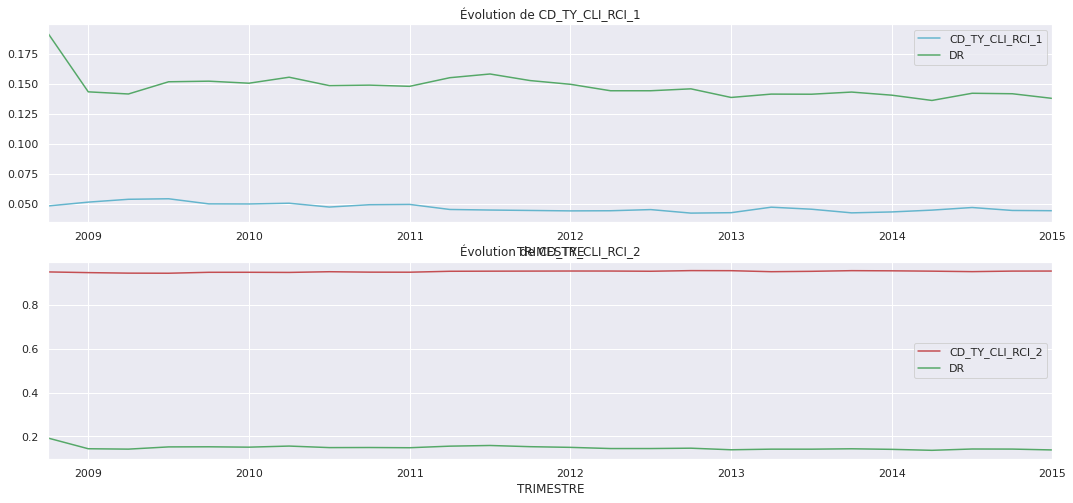

In [ ]:
graph_variables(type_client, data2)

Je ne remarque pas de lien évident entre le taux de défaut et le type de client.

Testons la normalités des données avec le test de shapiro.

In [ ]:
for client in type_client:
  print(client, shapiro(data2[[client]]))

CD_TY_CLI_RCI_1 ShapiroResult(statistic=0.9245811104774475, pvalue=0.057634174823760986)
CD_TY_CLI_RCI_2 ShapiroResult(statistic=0.9245809316635132, pvalue=0.05763360857963562)


En fonction de la valeur de alpha, on rejette ou non la normalité

## Mode d'habitation

Faisons la même chose avec le mode d'habitation

* 1 - locataire et autres
* 2 - propriétaire et manquant

In [ ]:
type_habitation = ['CD_MOD_HABI_1', 'CD_MOD_HABI_2']

On obtient le graph suivant :

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

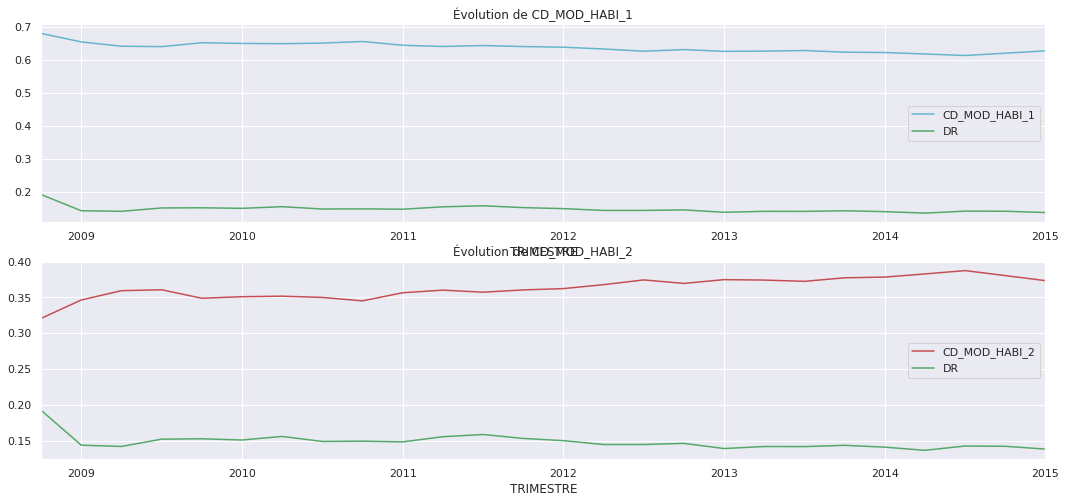

In [ ]:
graph_variables(type_habitation, data2)

On semble remarquer une certaine corrélation

In [ ]:
for habitation in type_habitation:
  print(habitation, shapiro(data2[[habitation]]))

CD_MOD_HABI_1 ShapiroResult(statistic=0.9492889046669006, pvalue=0.22316329181194305)
CD_MOD_HABI_2 ShapiroResult(statistic=0.9492886662483215, pvalue=0.22316096723079681)


## État civil

Désormais, pour l'état civil de la personne.

* 1 - la personnne est célibataire ou autre
* 2 - la personne est mariée ou manquant

In [ ]:
etat_civil = ['CD_ETA_CIV_1', 'CD_ETA_CIV_2']

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

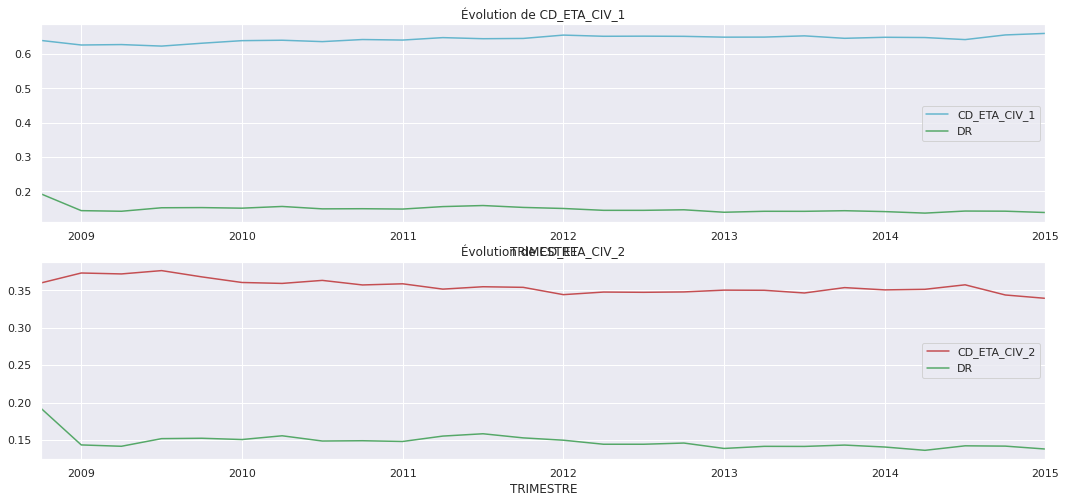

In [ ]:
graph_variables(etat_civil, data2)

On semble remarquer une certaine corrélation

In [ ]:
for et in etat_civil:
  print(et, shapiro(data2[[et]]))

CD_ETA_CIV_1 ShapiroResult(statistic=0.9535097479820251, pvalue=0.2797904908657074)
CD_ETA_CIV_2 ShapiroResult(statistic=0.9535102844238281, pvalue=0.27979886531829834)


## Code qualité du véhicule

Désormais, pour le code qualité du véhicule.

* 1 - véhicule d'occasion
* 2 - véhicule neuf et autres et manquant

In [ ]:
type_vehicule = ["CD_QUAL_VEH_1", "CD_QUAL_VEH_2"]

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

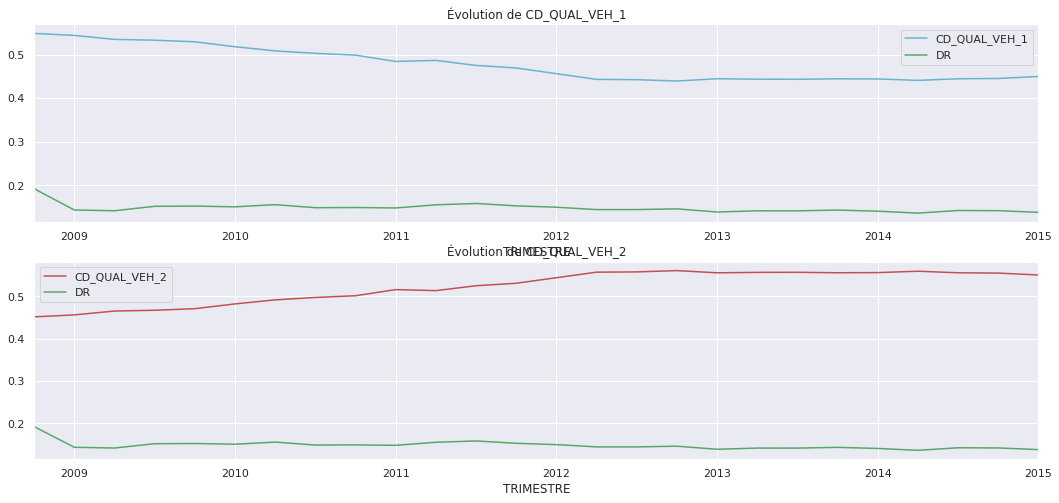

In [ ]:
graph_variables(type_vehicule, data2)

On remarque que lors de l'augmentation de proportion de vente de véhicule neufs. le taux de défaut à augmenté également (légèrement)

In [ ]:
for vehicule in type_vehicule:
  print(vehicule, shapiro(data2[[vehicule]]))

CD_QUAL_VEH_1 ShapiroResult(statistic=0.8372223973274231, pvalue=0.0008120793499983847)
CD_QUAL_VEH_2 ShapiroResult(statistic=0.8372222781181335, pvalue=0.0008120753918774426)


## Profession

Désormais, pour la profession de la personne ayant contracté un crédit.

* 1 - Ouvriers et Autres
* 2 - Employés, Autres personnels de services
* 3 - Retraites, Cadres, Professions libérales, Ingénieurs, Agents de Maitrise, ... et Manquants

In [ ]:
type_profession = ["CD_PROF_1", "CD_PROF_2", "CD_PROF_3"]

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

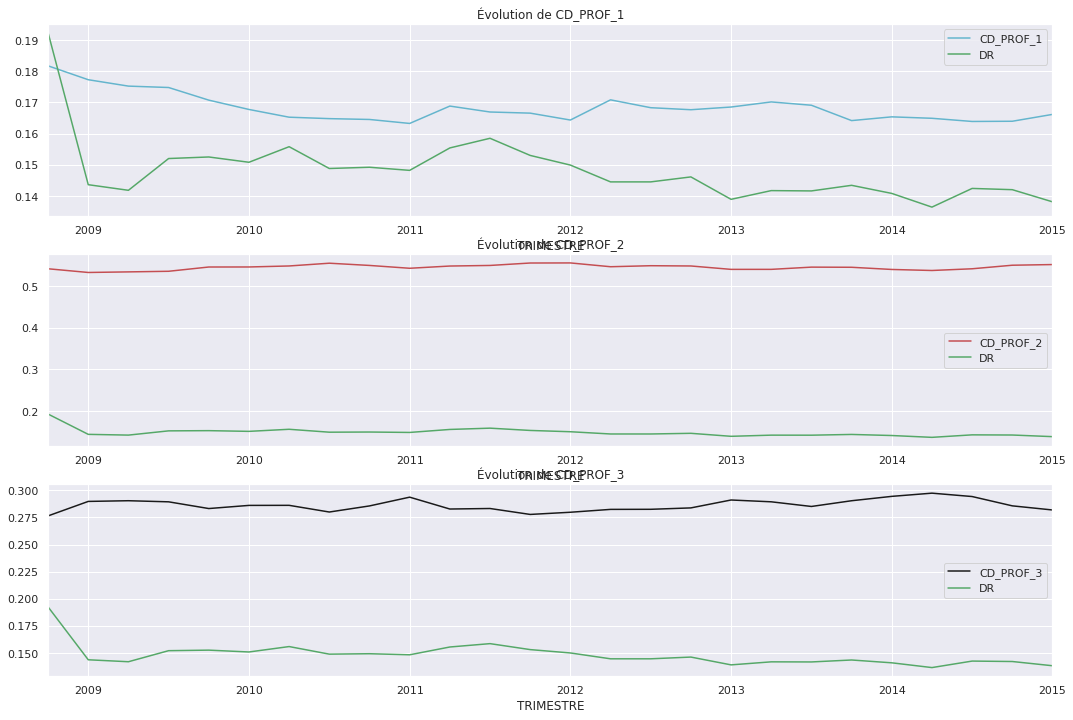

In [ ]:
graph_variables(type_profession, data2)

In [ ]:
for profession in type_profession:
  print(profession, shapiro(data2[[profession]]))

CD_PROF_1 ShapiroResult(statistic=0.8592342138290405, pvalue=0.0021600211039185524)
CD_PROF_2 ShapiroResult(statistic=0.9674910306930542, pvalue=0.5594699382781982)
CD_PROF_3 ShapiroResult(statistic=0.973600447177887, pvalue=0.7177691459655762)


## Modélisation avec le modèle ARDL

In [ ]:
endo_variable = "DR"
exo_variable = ["CD_PROF_1", "CD_PROF_2", "CD_PROF_3",
                "CD_QUAL_VEH_1", "CD_QUAL_VEH_2",
                'CD_ETA_CIV_1', 'CD_ETA_CIV_2',
                'CD_MOD_HABI_1', 'CD_MOD_HABI_2',
                'CD_TY_CLI_RCI_1','CD_TY_CLI_RCI_2']

In [ ]:
#Import the required modules for TimeSeries data generation:
import statsmodels.api as sm
#Import the required modules for test statistic calculation:
import statsmodels.stats as sm_stat
#Import the required modules for model estimation:
import statsmodels.tsa as smt
#Import the required modules for optimization:
import scipy.optimize as optimize

#We also need additional data:
import statsmodels.formula.api as smf

# Focus on the Third DATASET (CHRONIQUE = Global)

# General:

### Analysis of mean, median etc. datas

In [ ]:
fig, axes = plt.subplots(8,1,figsize=(20,50))
columns_used = [['mean_1','median_1','p5_1','p10_1','p25_1','p75_1','p90_1','p95_1']]

for i in range(1,8):
  columns_used.append(list(map(lambda x: x[:-1] + str(int(x[-1])+1),columns_used[-1])))

for i in range(8):
  v1 = data1[columns_used[i]]
  sns.lineplot(data=v1,ax=axes[i%8],legend=True)

NameError: ignored

### Evolution of each subvariables for each CHRONIQUE

In [ ]:
fig, axs = plt.subplots(nrows=2,ncols=4,figsize=(20, 10))
var_col = ['mean_'+str(i) for i in range(1,9)]
dfs = [data1,data2,data3]
labels=['CHR2','CHR8','Totale']
for mean, ax in zip(var_col, axs.ravel()):
  for df,label in zip(dfs,labels):
      df[mean].plot(ax=ax)
      ax.set_title(mean.upper())
      ax.set_xlabel("")
  ax.legend(labels,loc='center right')

plt.show()


### Plotting values from 1 to 8




In [ ]:
fig, axes = plt.subplots(8,3,figsize=(20,50))
columns_used = [['mean_1','median_1','p5_1','p10_1','p25_1','p75_1','p90_1','p95_1']]
for i in range(1,8):
  columns_used.append(list(map(lambda x: x[:-1] + str(int(x[-1])+1),columns_used[-1])))

data1_v1 = data1[['mean_1','median_1','p5_1','p10_1','p25_1','p75_1','p90_1','p95_1']]
data2_v1 = data2[['mean_1','median_1','p5_1','p10_1','p25_1','p75_1','p90_1','p95_1']]
data3_v1 = data3[['mean_1','median_1','p5_1','p10_1','p25_1','p75_1','p90_1','p95_1']]

for i in range(8):
  v1 = data1[columns_used[i]]
  v2 = data2[columns_used[i]]
  v3 = data3[columns_used[i]]
  sns.lineplot(data=v1,ax=axes[i%8,i%3],legend=False)
  sns.lineplot(data=v2,ax=axes[i%8,(1+i)%3],legend=False)
  sns.lineplot(data=v3,ax=axes[i%8,(2+i)%3],legend=True)
  plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

We can observe that:

*   the subvariables 3,5,7 are the more volatile for the chronique CHR2
*   the subvariables 1,5,8 are the more volatile for the chronique CHR8
* the subvariables 3,4,5,8 are the more volatile for the chronique totale



*We haven't take into account the median and the quantiles*

### Exogenous variables

In [ ]:
sns.lineplot(data=data["PIB"])
data["PIB"].describe()

In [ ]:
sns.lineplot(data=data["Inflation"])
data["Inflation"].describe()

In [ ]:
sns.lineplot(data=data["Tx_cho"])
data["Tx_cho"].describe()

### Other variables

## c. Stationary test on DR:

In [ ]:
# Augmented Dickey-Fuller test
# Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
# Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.
# If the p-value is bellow a threshold we reject the hypothesis and the data is possibly stationary
T1 = adfuller(Y1)
T2 = adfuller(Y2)
T3 = adfuller(Y3)
print(f"p-value of Y1 (DR under CHR2) : {T1[1]}")
print(f"p-value of Y2 (DR under CHR8) : {T2[1]}")
print(f"p-value of Y2 (DR under Totale) : {T3[1]}")

Remarks:
The p-value for each test are greater than 0.05 treshold so we strongly not reject the null hypothesis that datas have a unit root, so that they are not stationary. We have to transfom the datas to make them stationary and therefore create an auto-regressive model.

## c. Correlation 

### Correlation without the 8 subvariables for each chronique

In [ ]:
MatriceCorrelation1=data1.drop(data1.iloc[:, 3:3+8*8],axis = 1).corr()
sns.clustermap(MatriceCorrelation1, fmt='.2f', cmap=sns.diverging_palette(h_neg=20, h_pos=220), center=0)

For the **chronique CHR2**.

We can observe that DR is **strongly correlated** with:
*   CD_QUAL_VEH_1
*   CD_QUAL_VEH_2

And a **bit less correlated** with:
* CD_PROF_1
*   CD_MOD_HABI_1
* CD_ETA_CIV_1
*   CD_ETA_CIV_2
* Inflation
* PIB
* Tx_cho

In [ ]:
MatriceCorrelation2=data2.drop(data2.iloc[:, 3:3+8*8],axis = 1).corr()
sns.clustermap(MatriceCorrelation2, fmt='.2f', cmap=sns.diverging_palette(h_neg=20, h_pos=220), center=0)

For the **chronique CHR2**.

We can observe that DR is **strongly correlated** with:
* CD_MOD_HABI_1
*   CD_MOD_HABI_2
*   Tx_cho

And a **bit less correlated** with:
* PIB
* CD_QUAL_VEH_1
* CD_QUAL_VEH_2
* Inflation
* CD_PROF_1

In [ ]:
MatriceCorrelation3=data3.drop(data3.iloc[:, 3:3+8*8],axis = 1).corr()
sns.clustermap(MatriceCorrelation3, fmt='.2f', cmap=sns.diverging_palette(h_neg=20, h_pos=220), center=0)

For the **chronique CHR2**.

We can observe that DR is **strongly correlated** with:
* PIB 
* CD_ETA_CIV_1
* CD_ETA_CIV_2
* TX_cho
* CD_MOD_HABI_1
* CD_MOD_HABI_2
* CD_QUAL_VEH_1
* CD_QUAL_VEH_2
* CD_TY_CLI_RCI_1
* CD_TY_CLI_RCI_2

And a **bit less correlated** with:
* CD_PROF_1
* CD_PROF_2

### Correlation with only the 8 subvariables for each chronique

In [ ]:
data1.iloc[:, 2:3+8*8].corr()

### SIMON - matrice de corrélation

> Nettoyage des données



In [ ]:
MatriceCorrelation = data.corr()
MatriceCorrelation

In [ ]:
plt.matshow(MatriceCorrelation)
plt.colorbar()
plt.show()

On peut également le faire avec seaborn

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(MatriceCorrelation,vmax=1, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

une autre version pour tracer la matrice de corrélation, mais moins exploitable avec la quantité de données. Peu de variation de couleur entre les cellules.

In [ ]:
sns.clustermap(MatriceCorrelation, fmt='.2f', cmap=sns.diverging_palette(h_neg=20, h_pos=220), center=0)

In [ ]:
data_copy = data.copy() # nous faisons une copy du data set initial 

## First conlusion

The credit risk measurement is Point In Time (PIT)
> Rating models based on macroeconomic variables



## Data preprocessing



*   Exclusion of extreme values
*   Standardization of data
* Exclusion of correlated variables
* Identification of candidate variables
* Identify the sensitivity to systemic factors/exogenous variables

* Dividing the dataset into 3 datasets
> One for training, one for test, one for the stress test corresponind of the 2008 crisis (a subsample of the training dataset) 





Score rating structure:


*   2 groups corresponding of the chroniques
*   Into thesese groups a new Score rating structure



Potential model:

*   identify the chronique knowing the portfolios characteritics
*   identify the PD knowing the chroniques



# 4.  Predictions models

- Basic predictions models:
> - Traditional modelling techniques: testing ARDL, ARIMAX ... -> CI integration
> - Recent modelling techniques: testing relevant models
> - Provide interpretation of results for both families of models

- Advanced predictions models :
> - Advanced modelling techniques using ML: Logistic Regression, ...
> - Build an optimal hybrid model based on the previous model using this code : https://analyticsindiamag.com/a-hands-on-guide-to-hybrid-ensemble-learning-models-with-python-code/

## First approach without the 8 subvariables

In [ ]:
fig,ax = plt.subplots(2,1,figsize=(20,10))
fig = sm.graphics.tsa.plot_acf(Y1,lags=12, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(Y1,lags=12, ax=ax[1])
plt.show()

NameError: ignored

In [ ]:
mod = sm.tsa.arima.ARIMA(endog=Y1, 
                         exog=data1[['CD_QUAL_VEH_1','CD_QUAL_VEH_2']].to_numpy(),
                         order=(2, 0, 0))
res = mod.fit()
print(res.summary())

NameError: ignored

In [ ]:
residuals = pd.DataFrame(res.resid)
residuals.plot()

In [ ]:
fig,ax = plt.subplots(2,1,figsize=(20,10))
fig = sm.graphics.tsa.plot_acf(Y2,lags=12, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(Y2,lags=12, ax=ax[1])
plt.show()

In [ ]:
fig,ax = plt.subplots(2,1,figsize=(20,10))
fig = sm.graphics.tsa.plot_acf(Y3,lags=12, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(Y3,lags=12, ax=ax[1])
plt.show()

## 

> Bloc en retrait



## Final approach : Hybrid Model

# 5.  Performance

- Performance:
> - Present and interpret the results of the main performance indicators to validate the forecast model (BIC, AIC,...)
> - Validate the quality of the forecasts (Back-testing on the 2nd day): compare the projection with the observation and present/interpret the synthetic indicators (RMSE MAE,...)